IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME11: projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

### MUNSUP Warintara 28707636
### MAM Snkar 21300810

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**Ce TD-TME11 est prévu pour être fait lors de la dernière séance de TD-TME11 de votre groupe.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-11-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2024


## Date de remise 

Le travail doit être rendu (sur le site Moodle) avant le <font size="+1" color="RED"><b>vendredi 17 mai 2024, à 18h</b></font>
    

<b>Il n'y aura pas d'extension de la date de remise autorisée : <font size="+1" color="RED">aucun rendu ne sera accepté après 18h.</font></b>

<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

## Travail à faire

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

Appliquer les algorithmes d'apprentissage non supervisés vus en cours (CAH et k-moyennes) sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- *Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 21 mai 2024**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- tme-11/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'scipy'

## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.

S'il n'est pas possible d'installer cette librairie, les données sont accessibles sur la page web citée ci-dessus (cliquer sur "Download" en haut et à droite de la page).

In [ ]:
pip install -U ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Chargement des données

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
pen_dataset = fetch_ucirepo(id=81)

# access data
X = pen_dataset.data.features
y = pen_dataset.data.targets

# access metadata
print(pen_dataset.metadata.uci_id)
print(pen_dataset.metadata.num_instances)
print(pen_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(pen_dataset.variables)

81
10992
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution.  Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to wr

### Apprentissage non-supervisé

Pour ce sujet, vous considèrerez seulement les données de description (features X) sur lesquelles vous proposerez des expérimentations des algorithmes d'apprentissage non-supervisé vus en cours mettant en évidence des clusters et leur évaluation.

Ainsi, vous devrez:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).


   


### Le poster

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données *Pen-Based Recognition of Handwritten Digits*, les résultats obtenus lors de l'apprentissage supervisé (études et résultats de votre TME-10) et lors de l'apprentissage non-supervisé (études et résultats de votre TME-11) ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.


# Expérimentations

## Vitualisation

/tmp/ipykernel_27243/4183204272.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x0 = X.iloc[0][i]
/tmp/ipykernel_27243/4183204272.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y0=X.iloc[0][i+1]
/tmp/ipykernel_27243/4183204272.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = X.iloc[0][i+2]
/tmp/ipykernel_27243/4183204272.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future ve

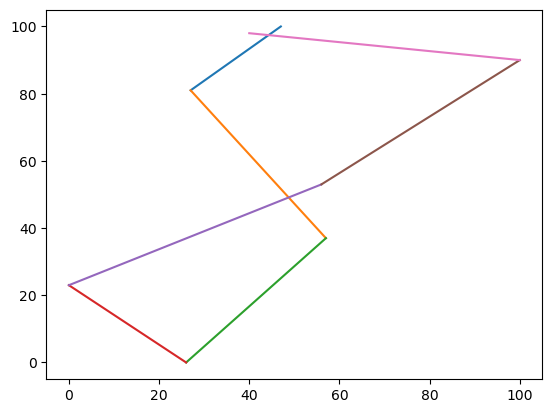

In [ ]:
import matplotlib.pyplot as plt
for i in range(0,13,2):
    x0 = X.iloc[0][i]
    y0=X.iloc[0][i+1]
    x1 = X.iloc[0][i+2]
    y1 = X.iloc[0][i+3]
    plt.plot([x0,x1],[y0,y1])
plt.show()

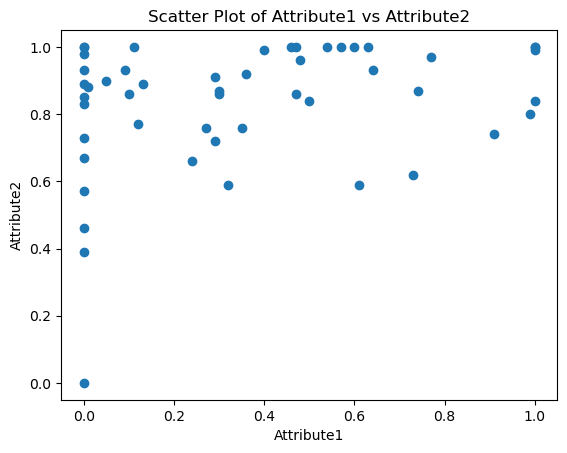

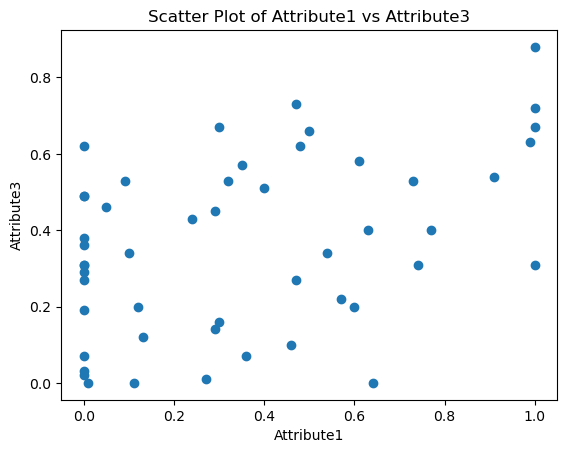

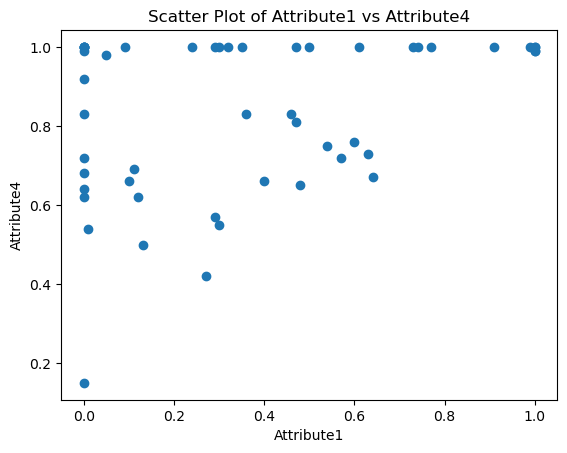

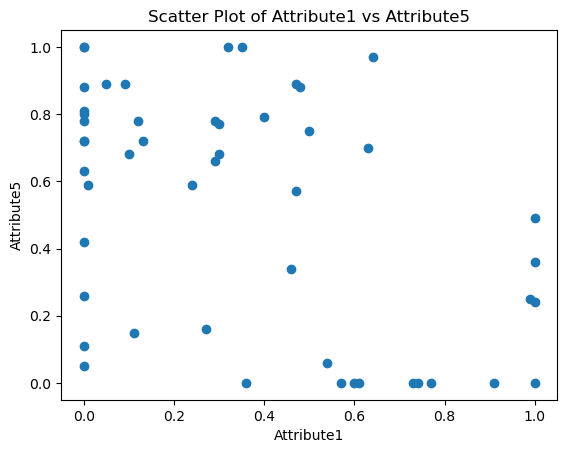

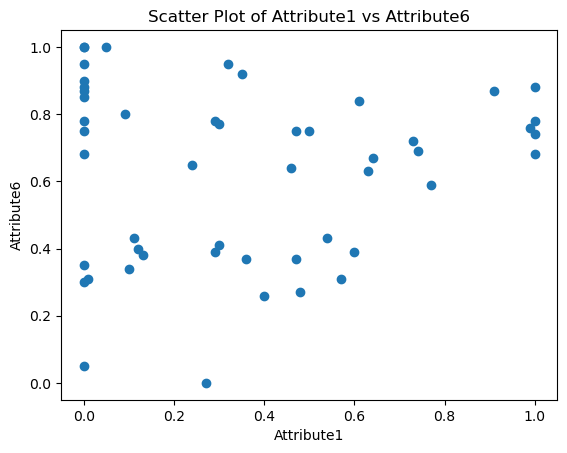

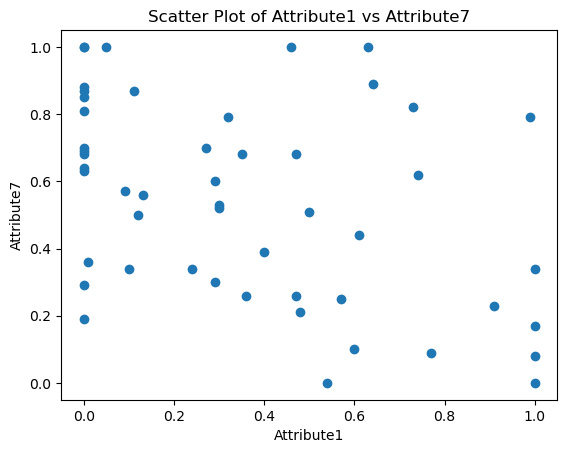

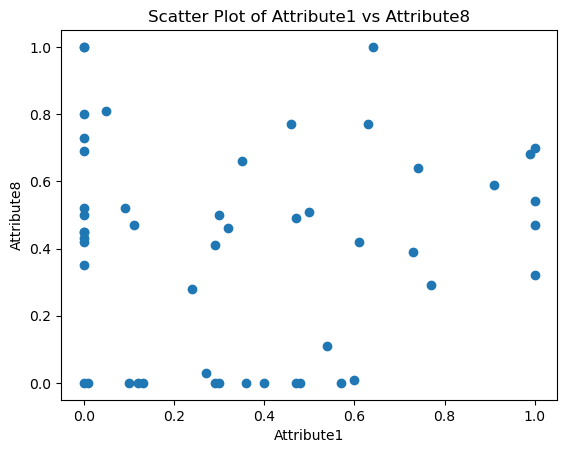

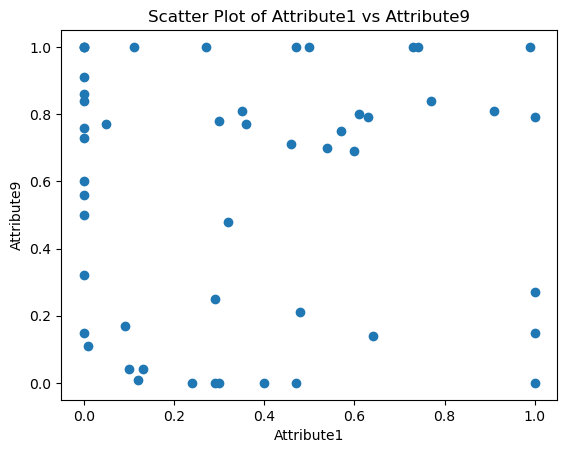

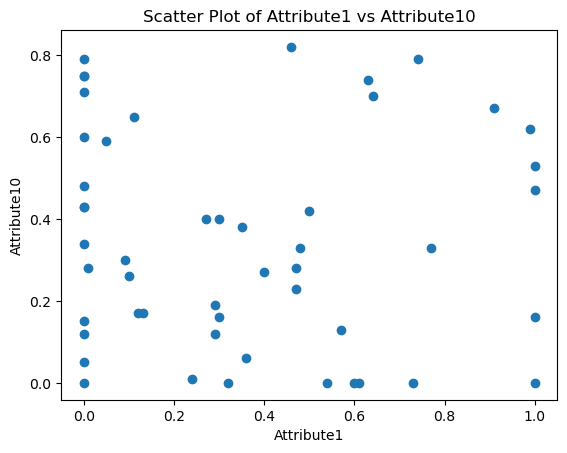

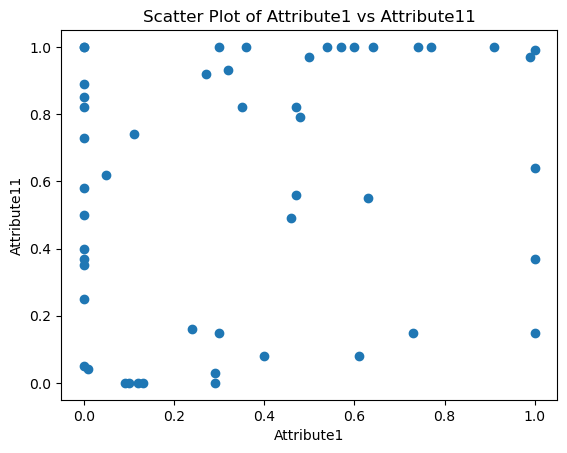

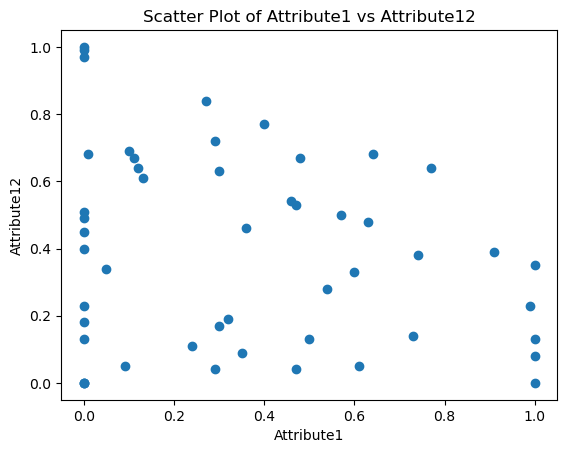

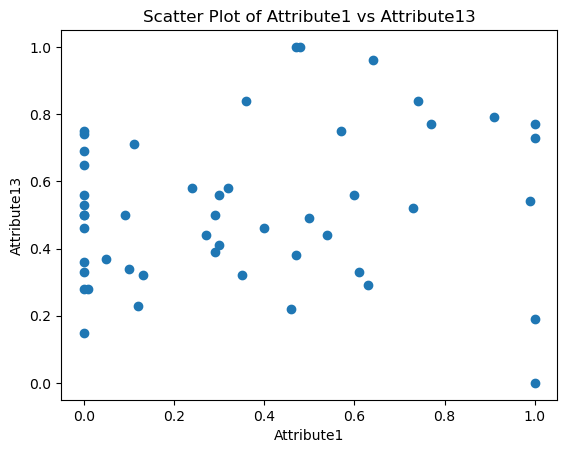

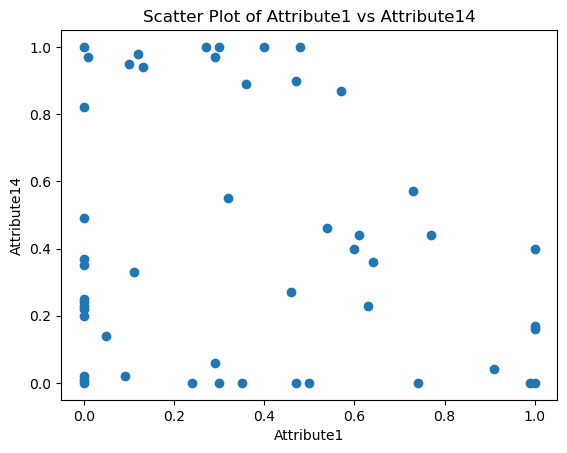

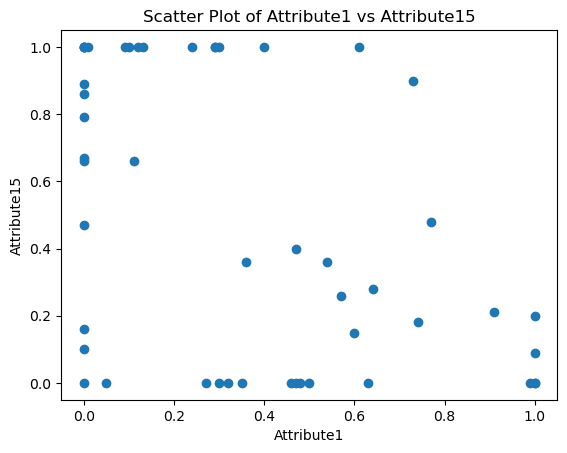

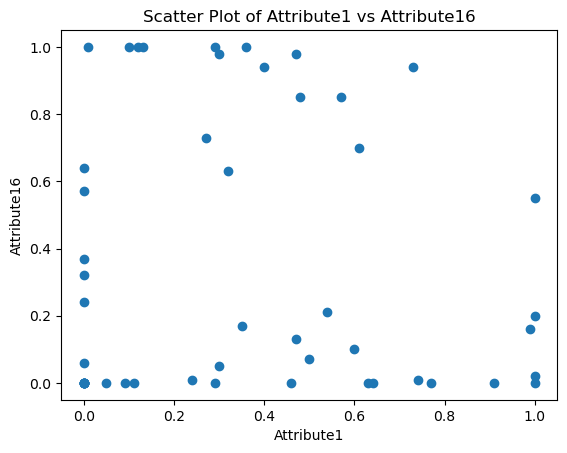

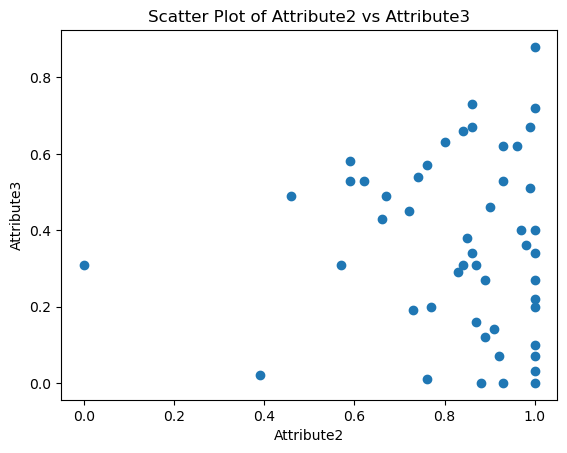

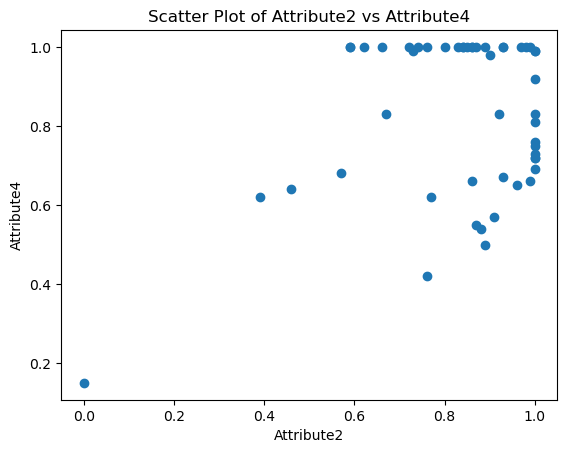

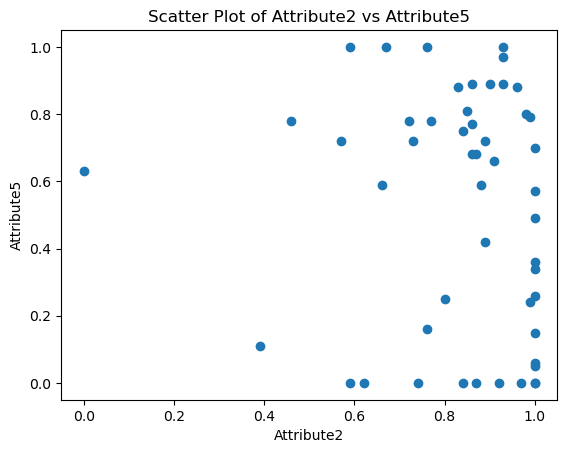

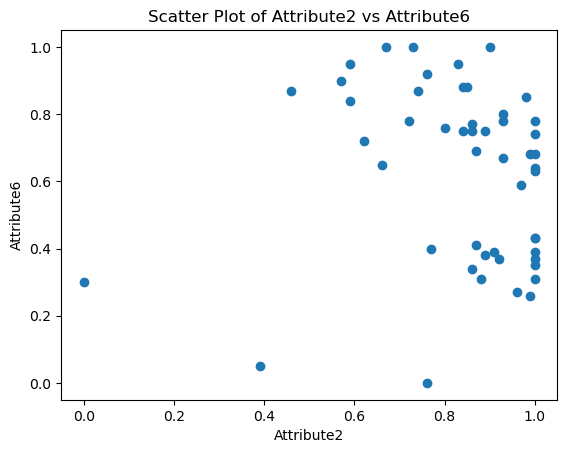

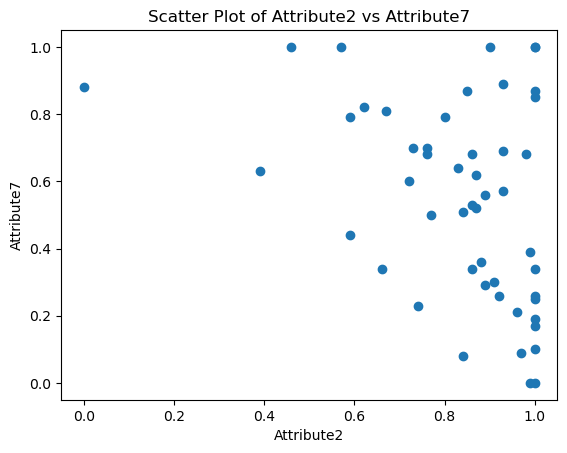

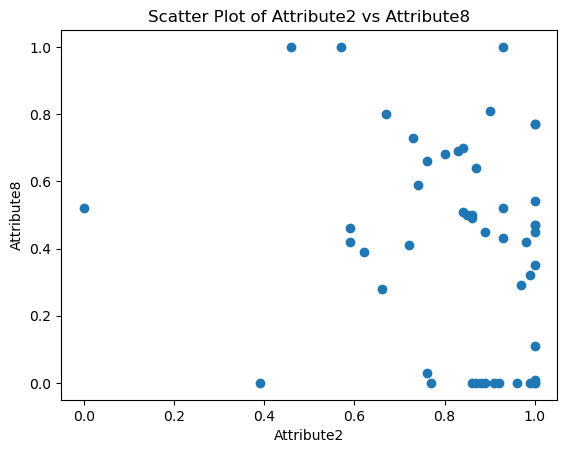

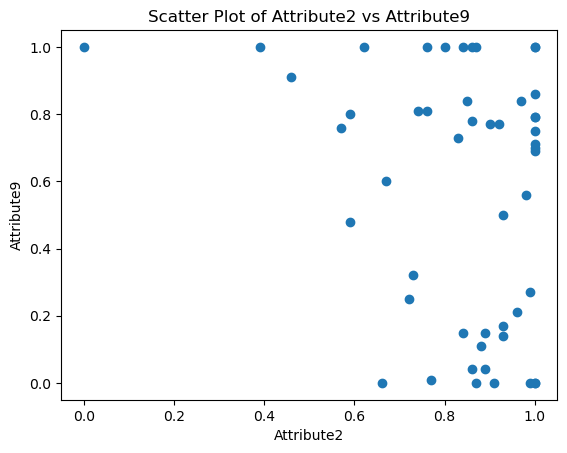

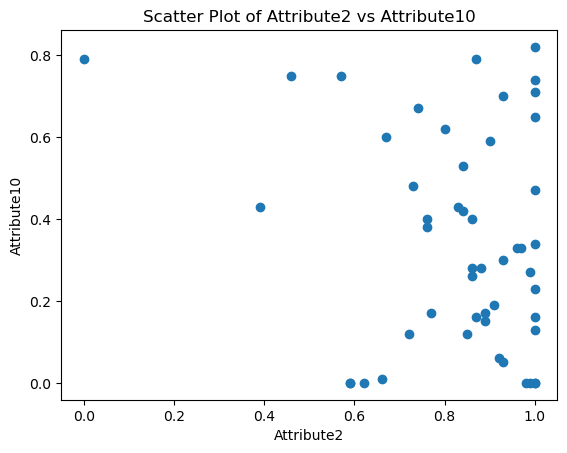

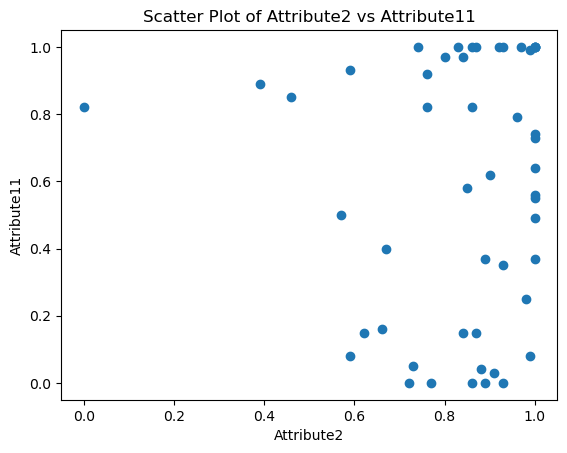

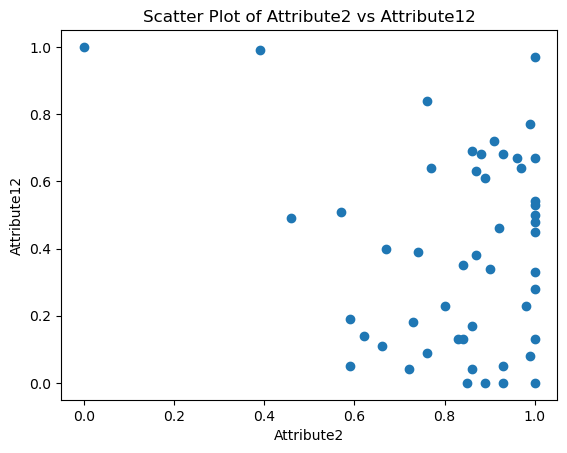

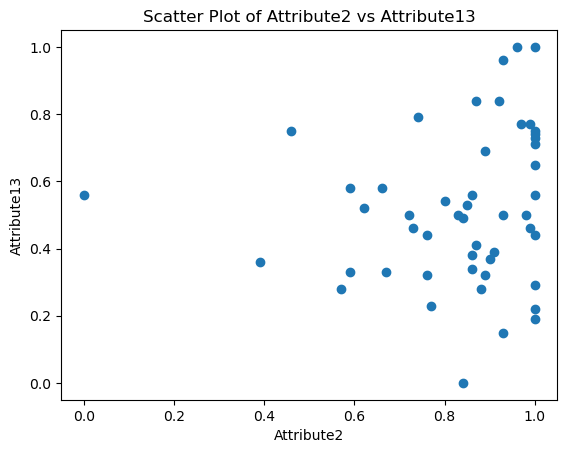

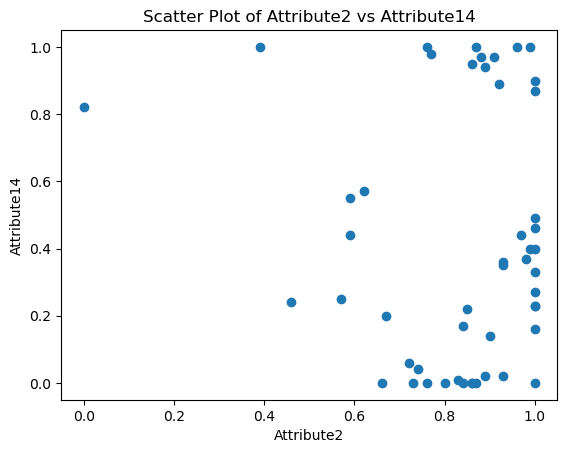

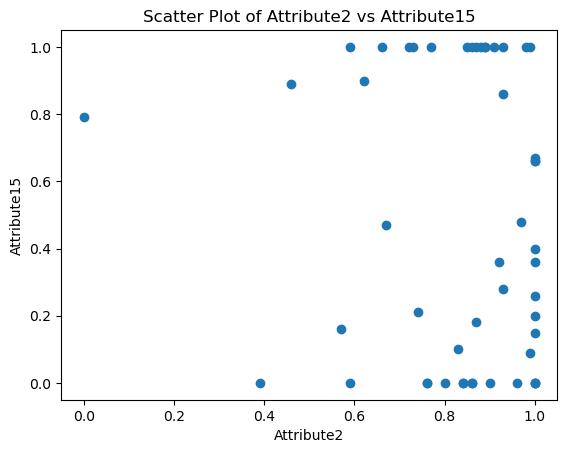

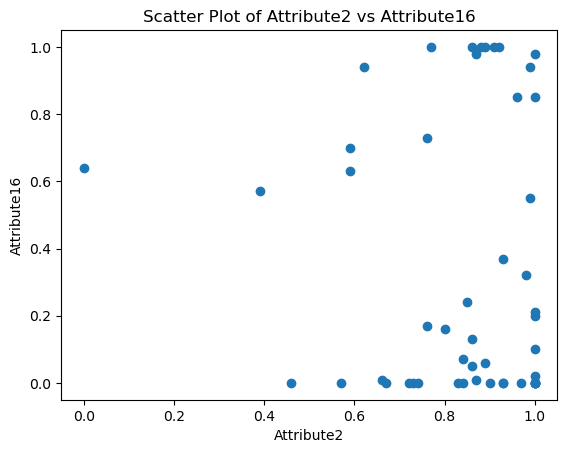

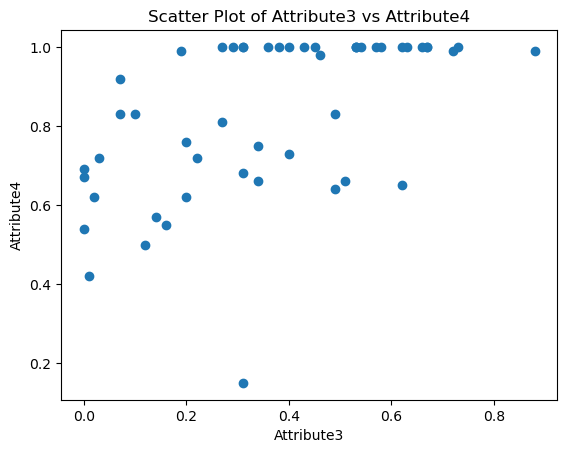

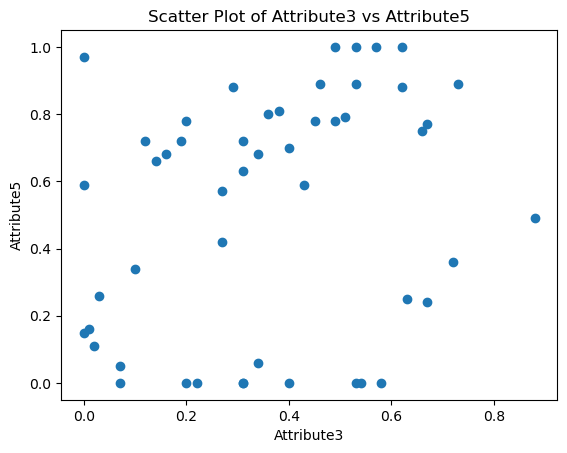

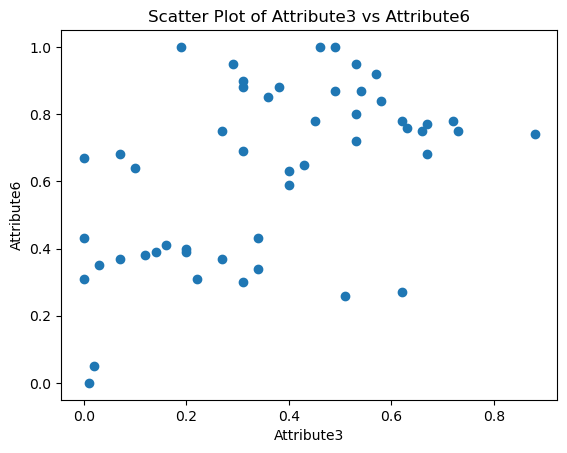

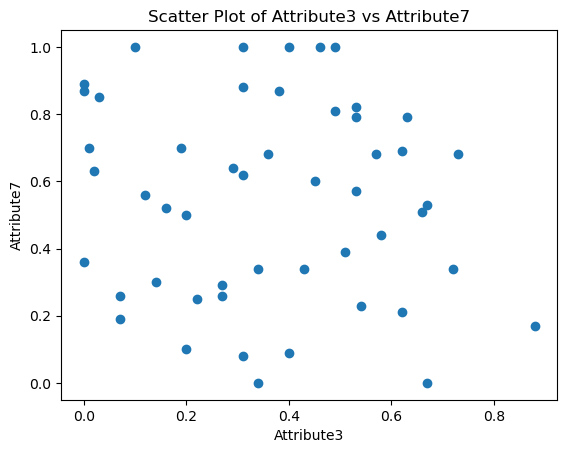

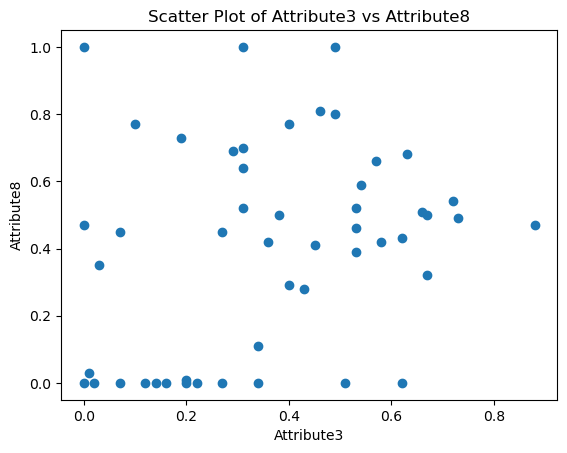

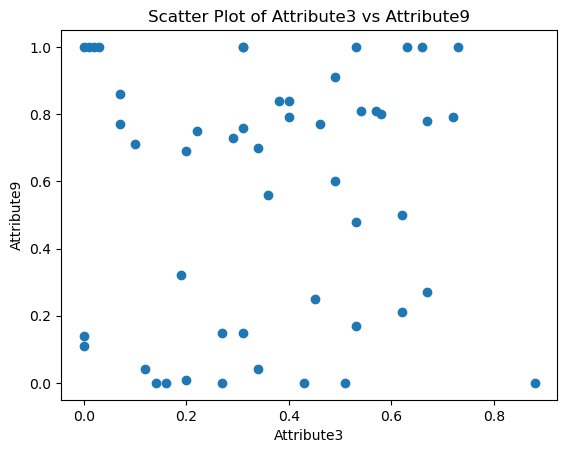

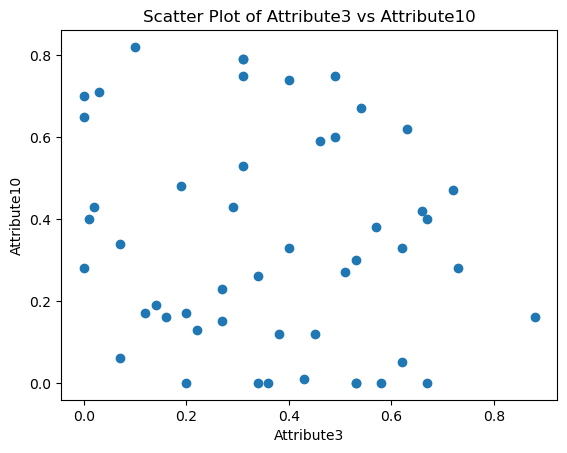

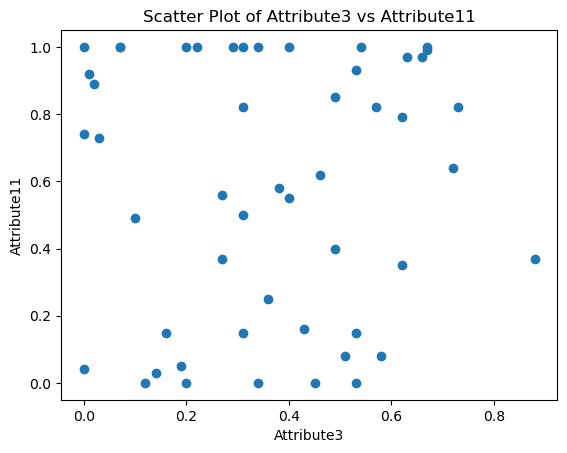

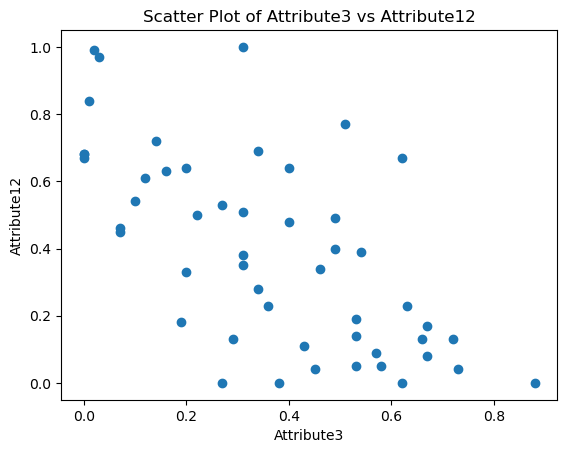

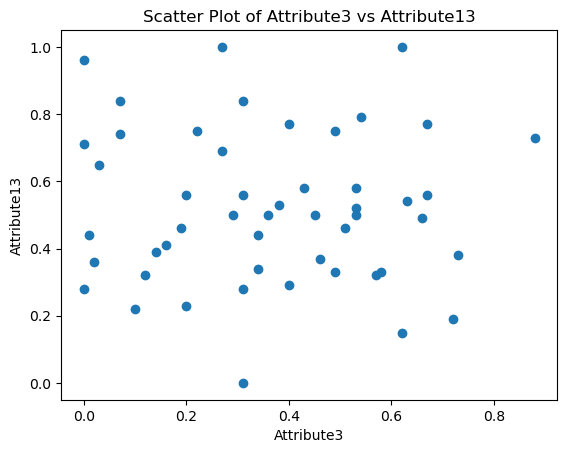

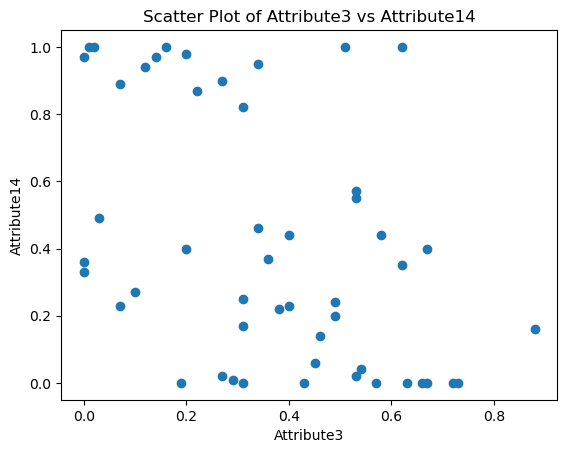

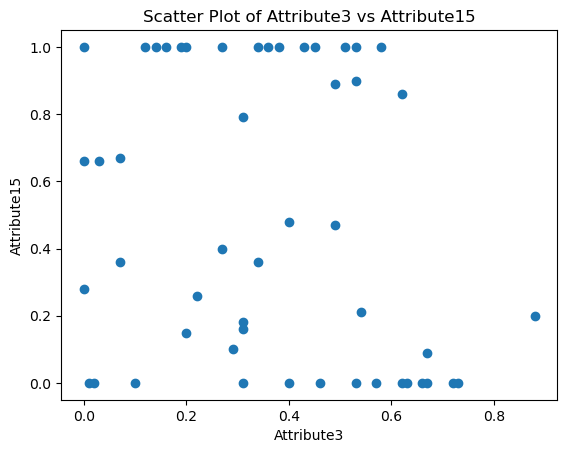

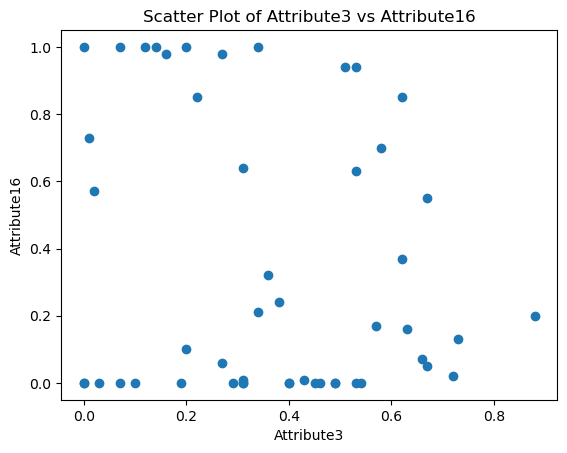

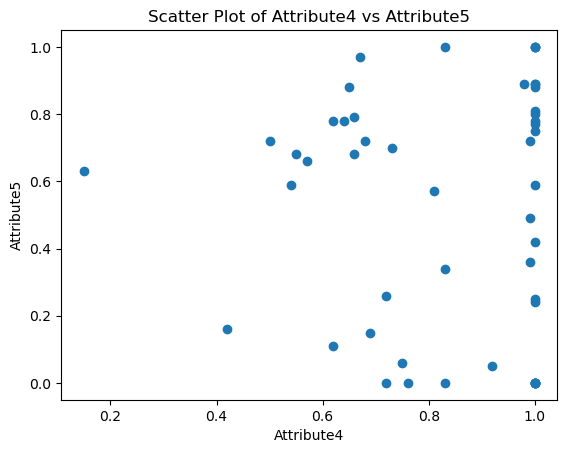

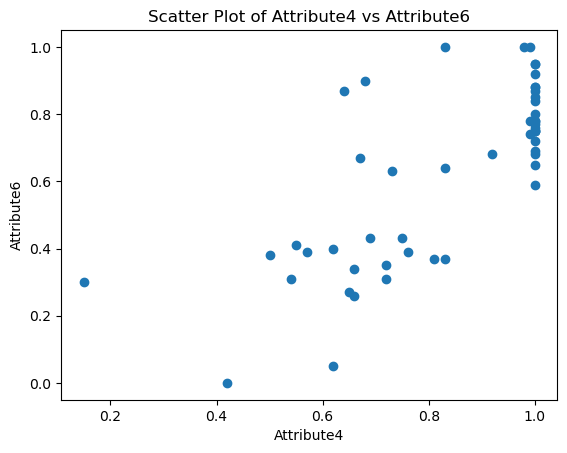

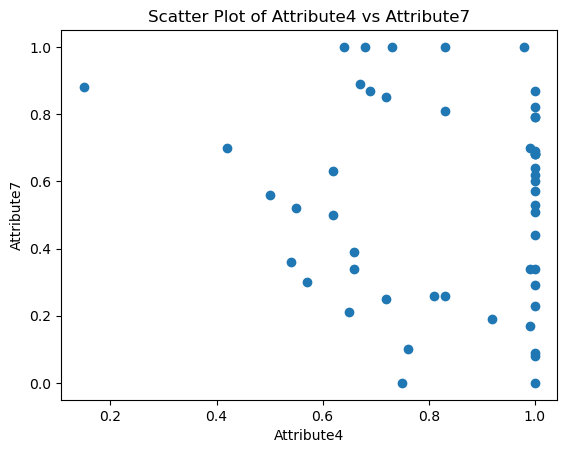

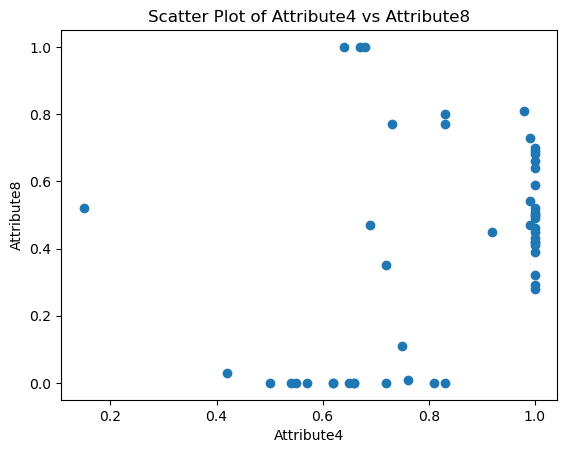

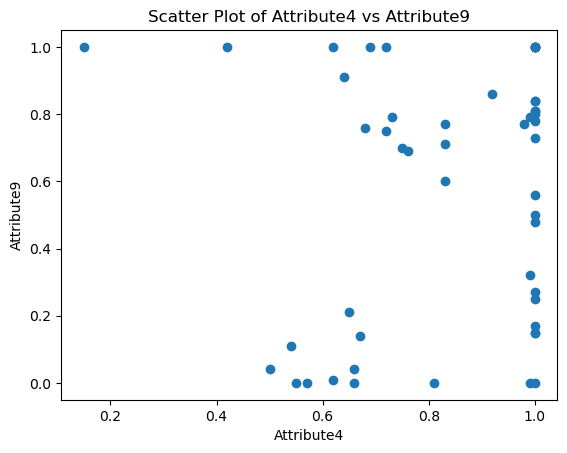

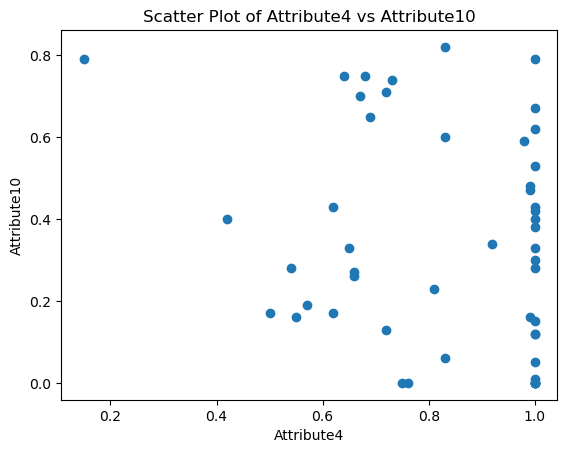

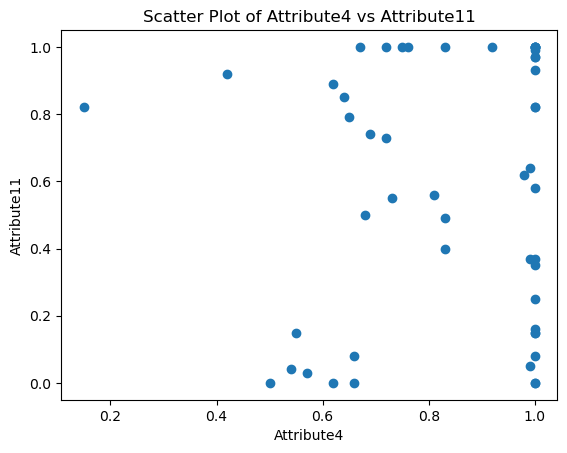

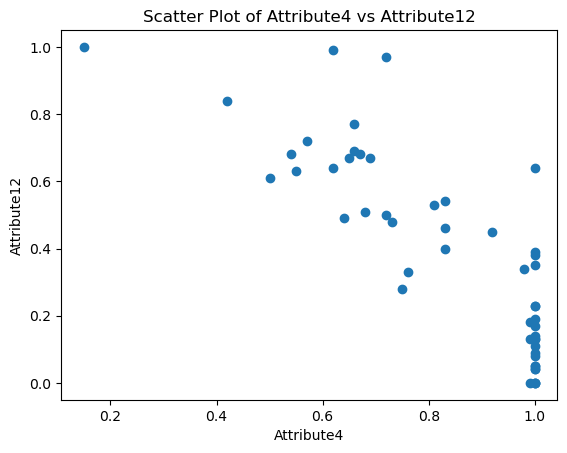

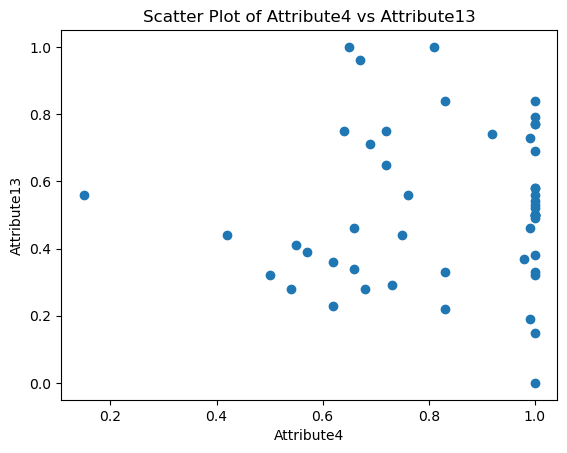

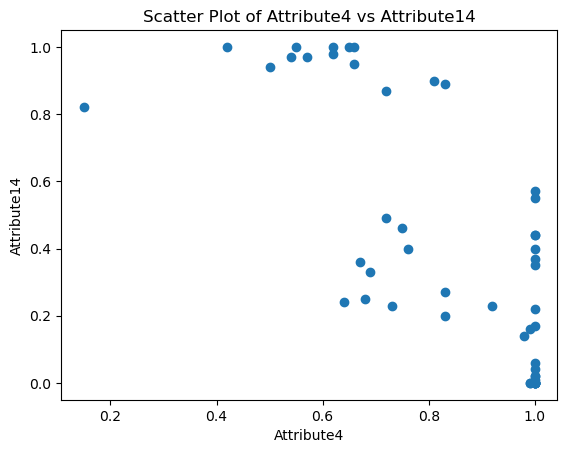

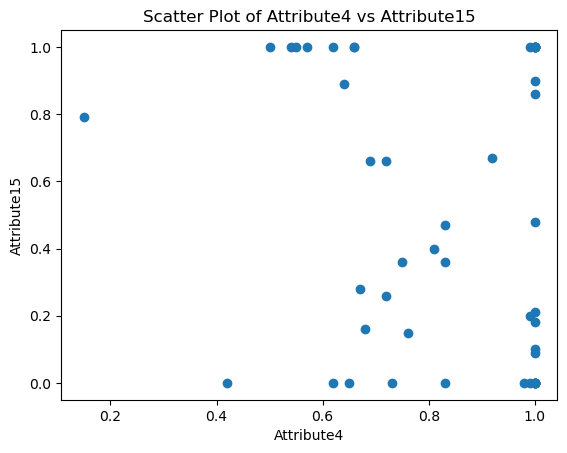

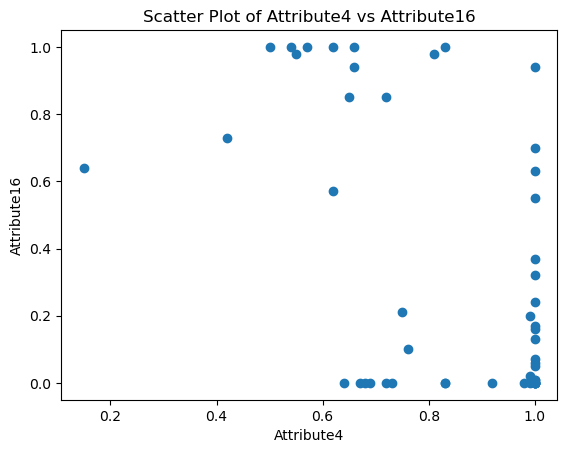

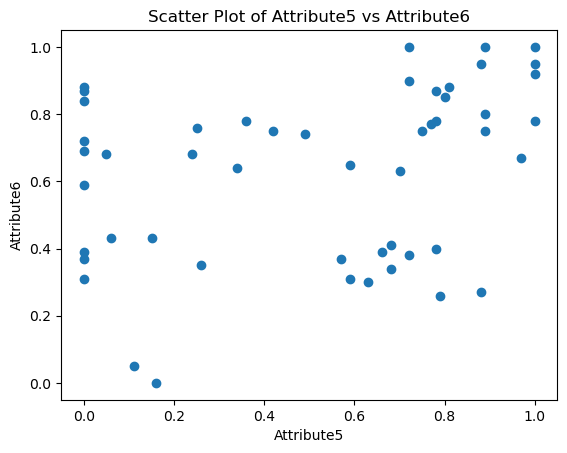

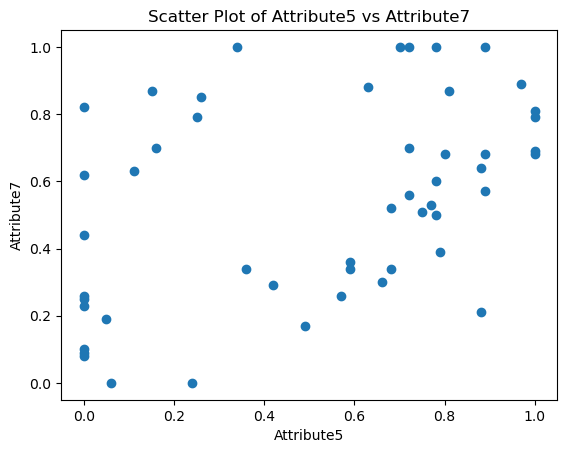

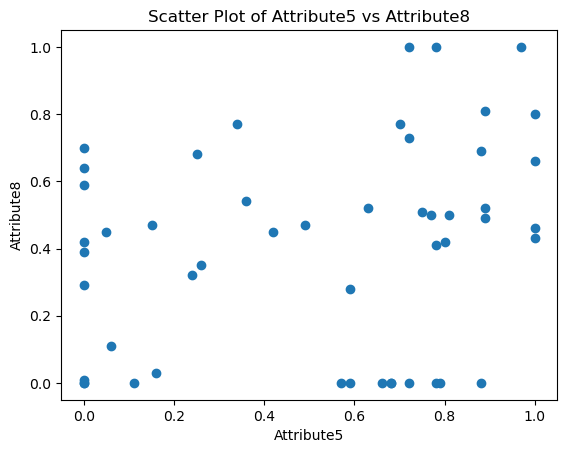

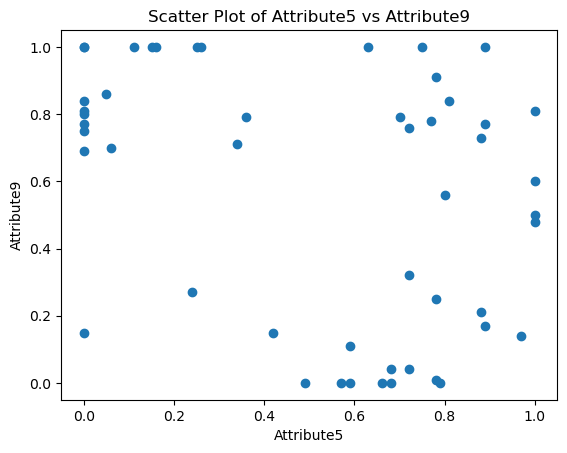

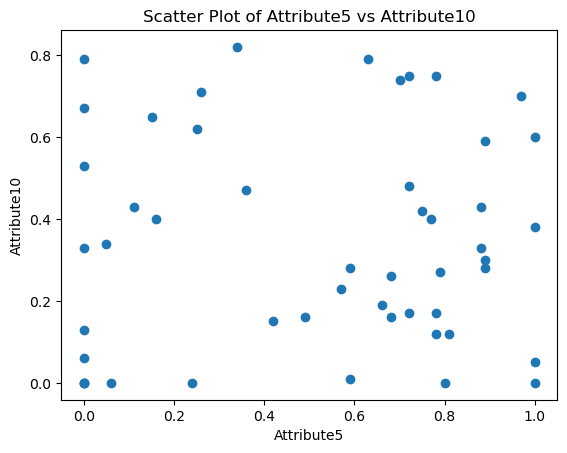

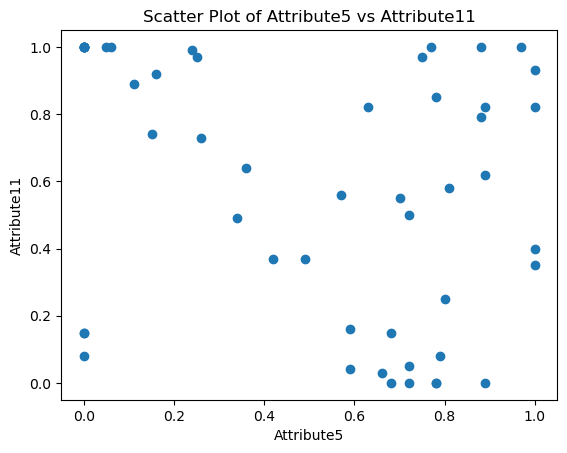

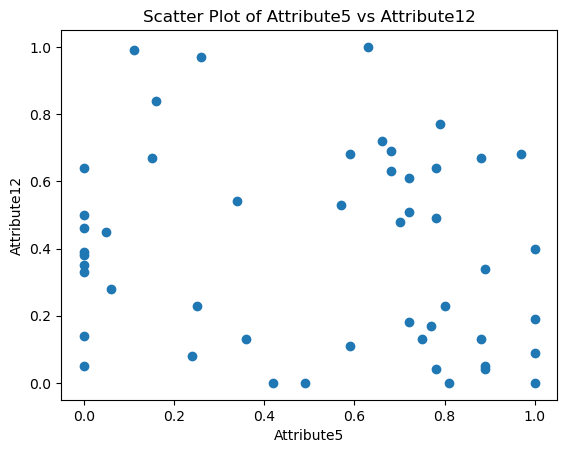

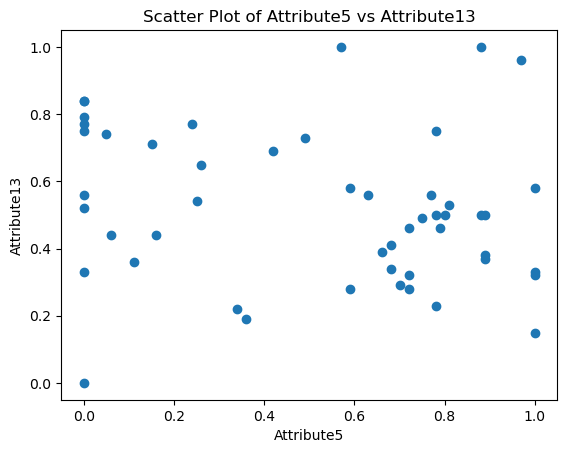

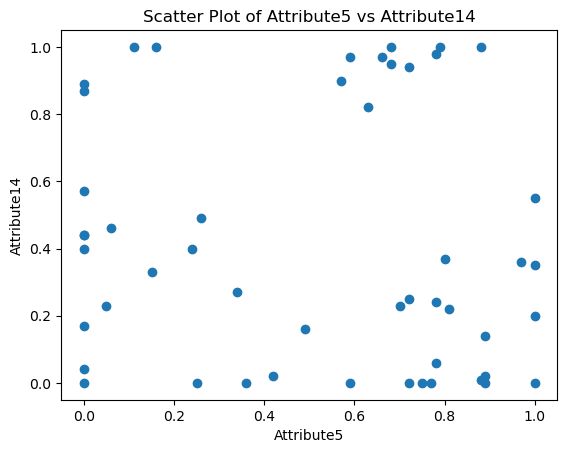

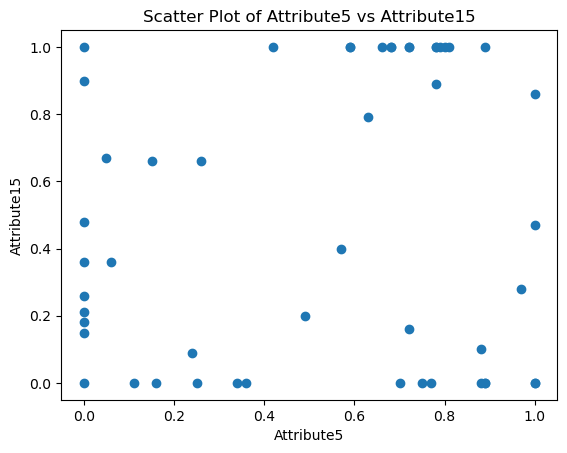

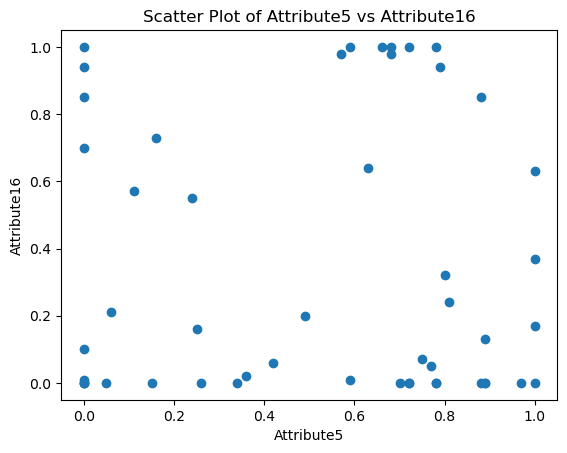

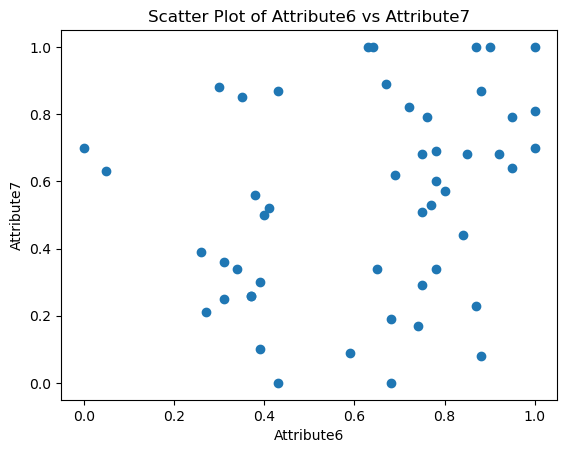

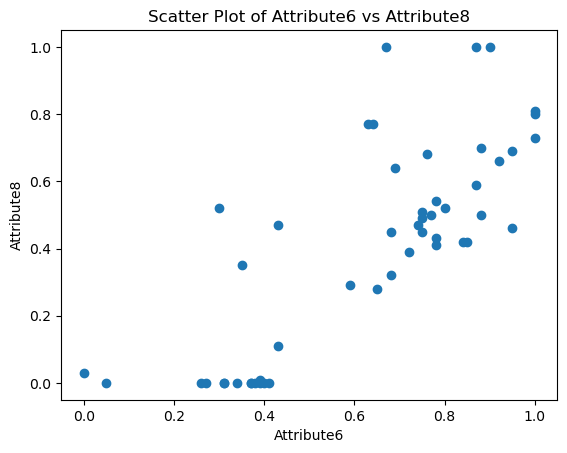

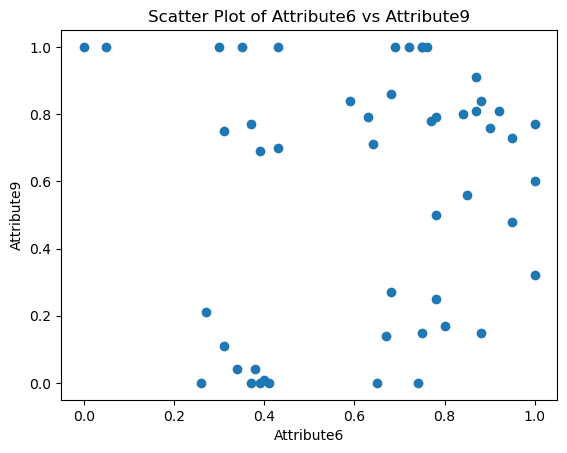

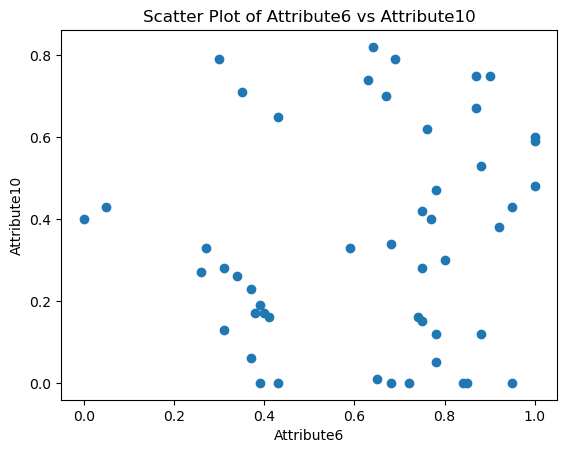

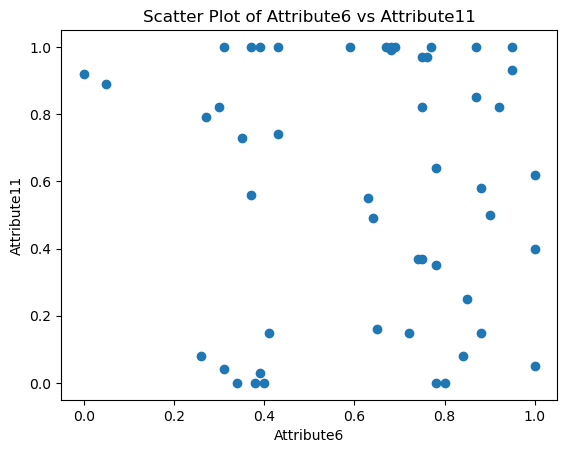

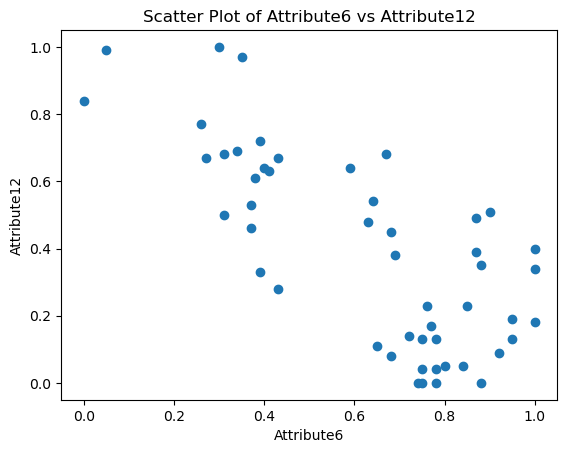

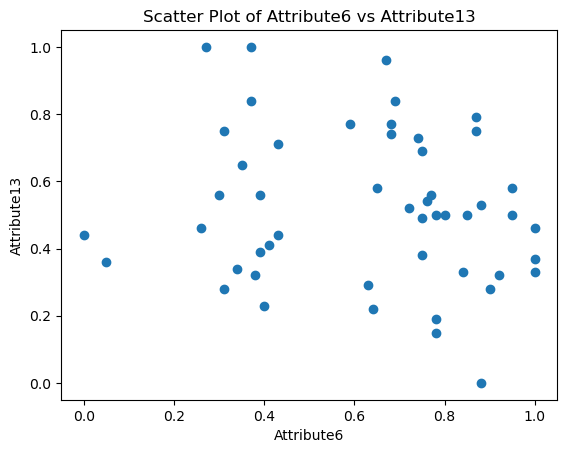

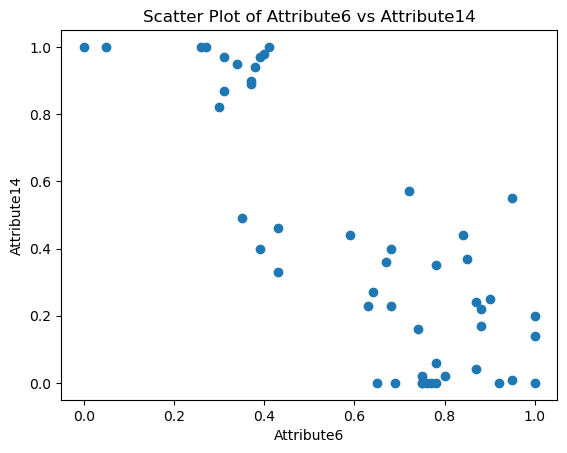

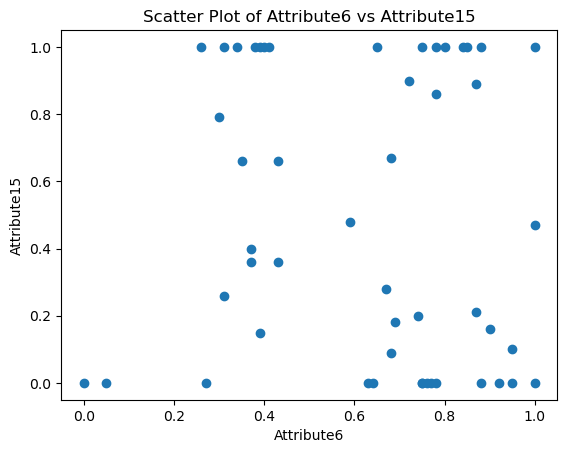

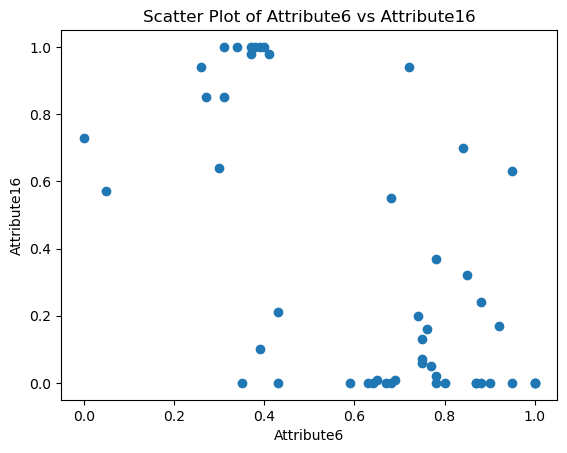

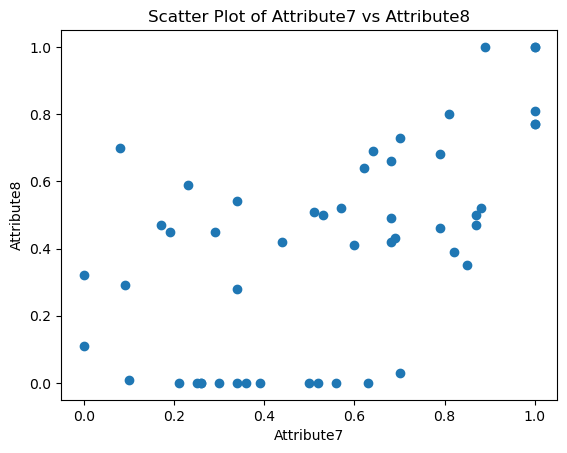

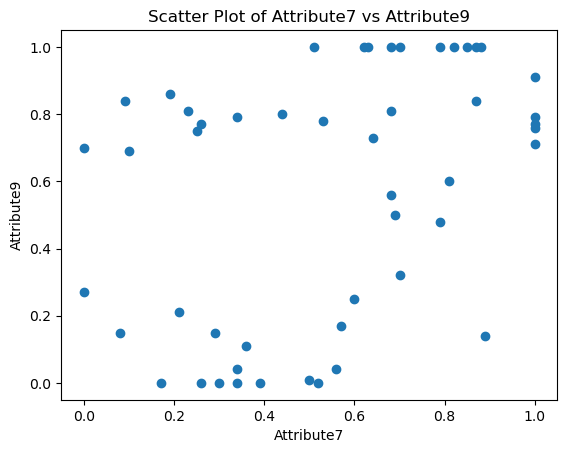

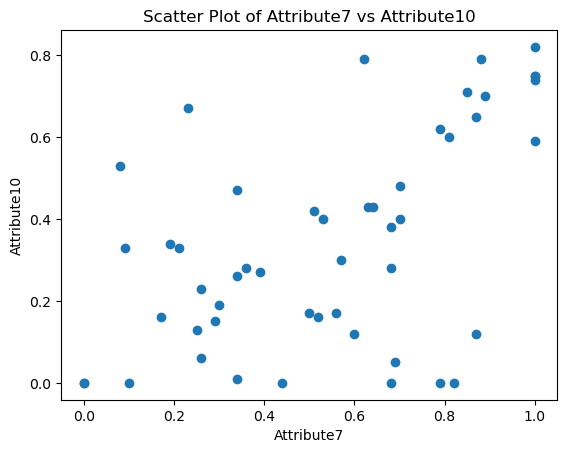

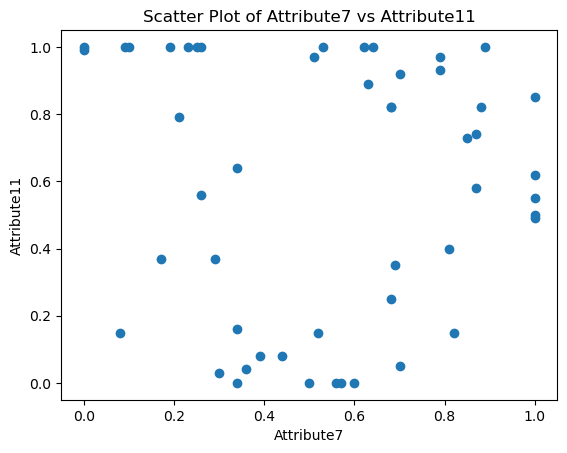

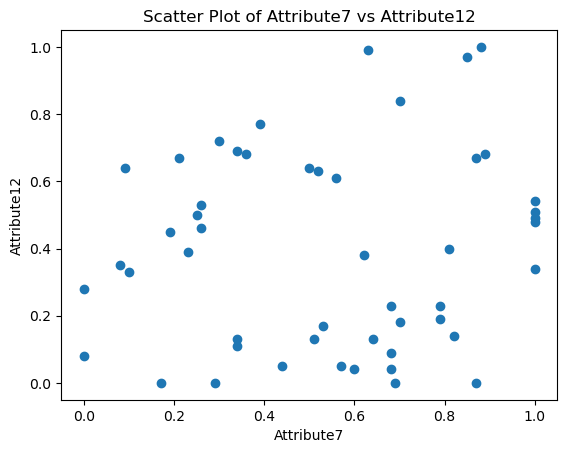

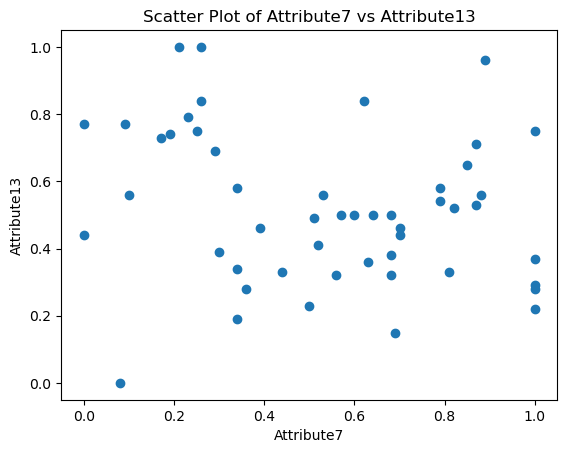

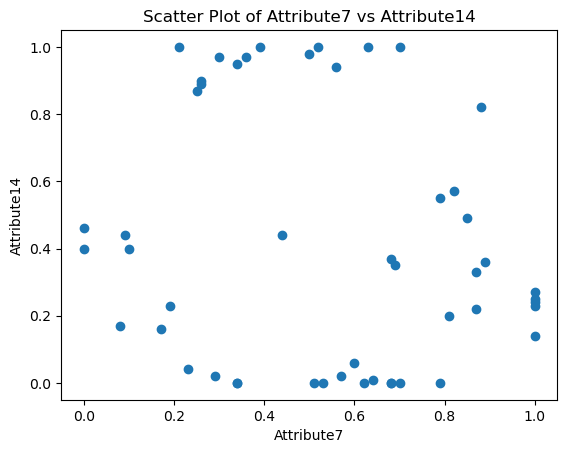

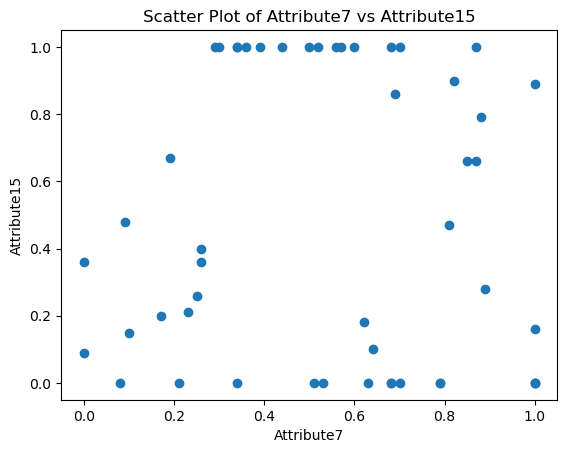

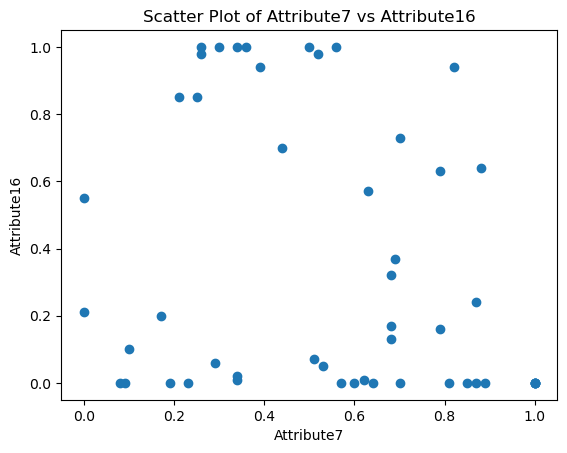

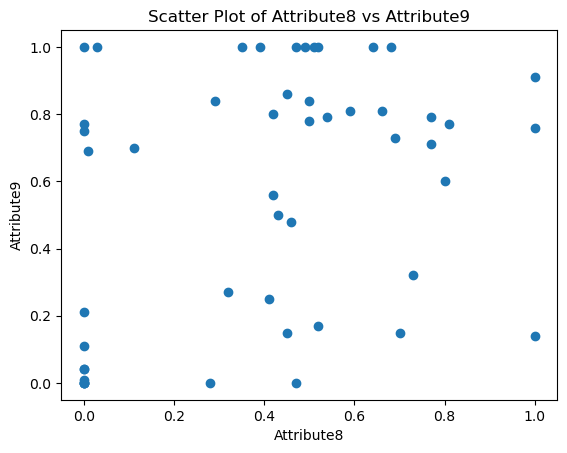

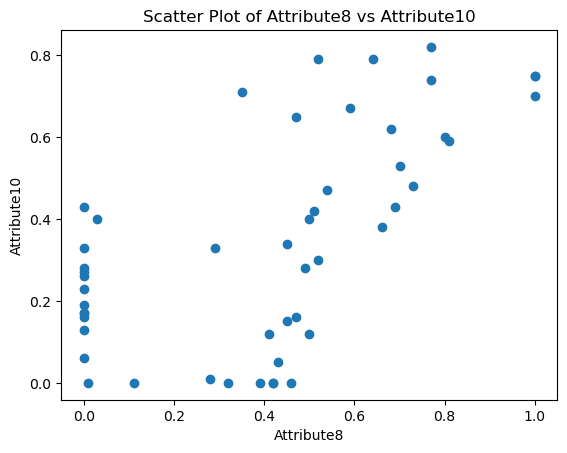

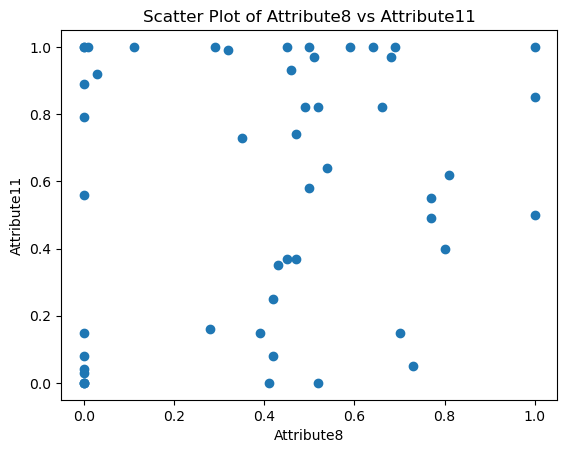

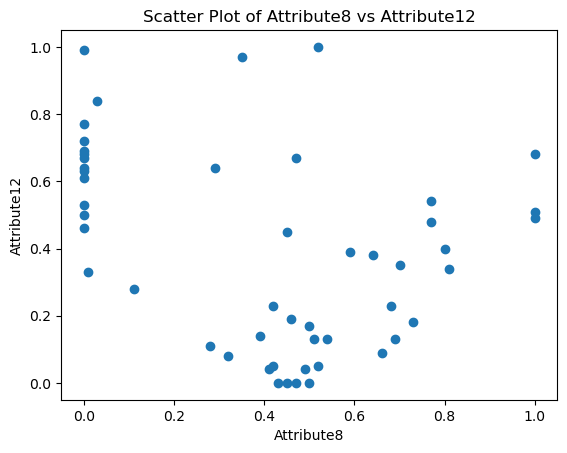

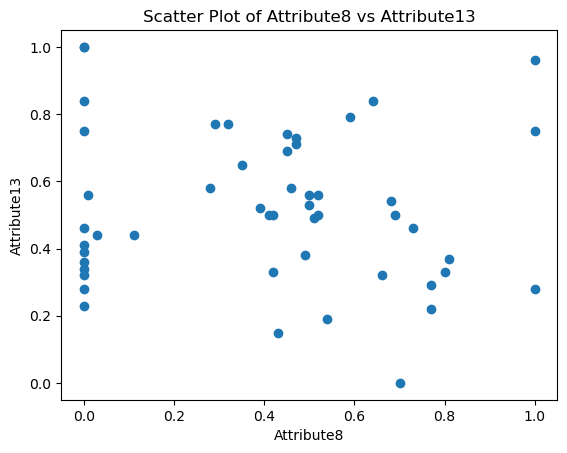

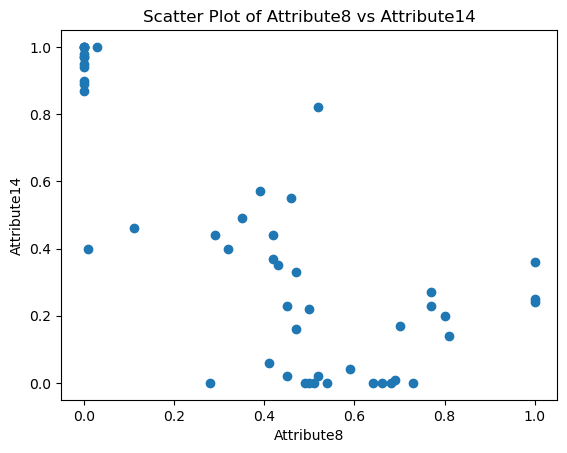

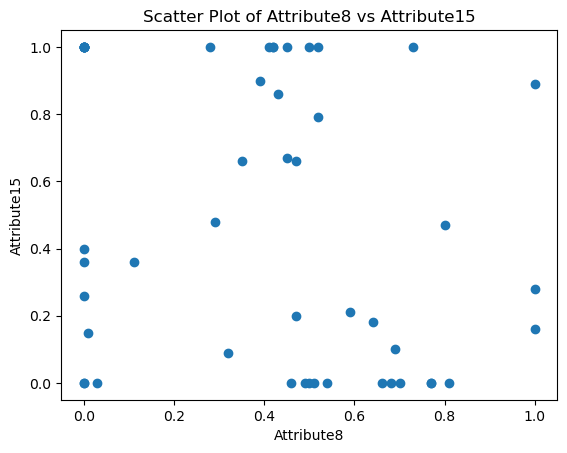

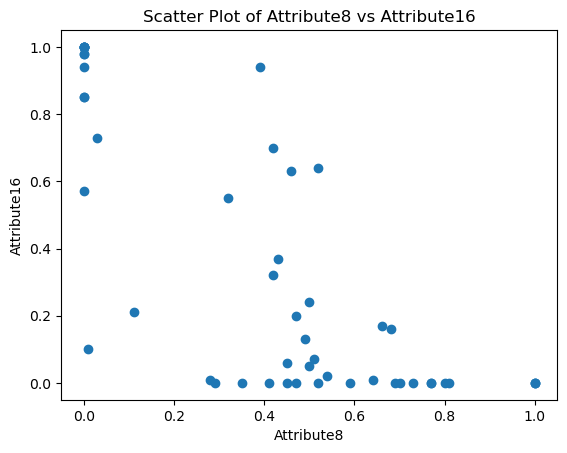

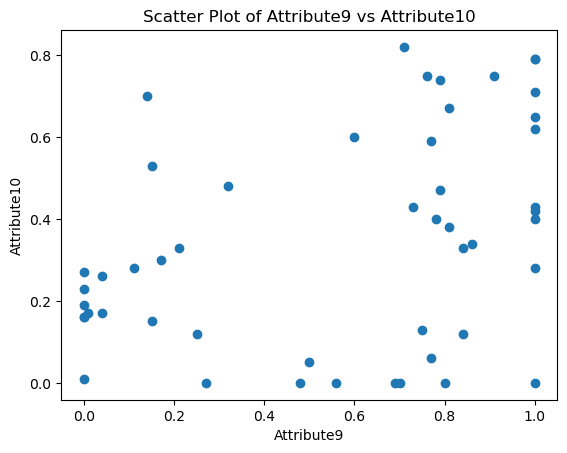

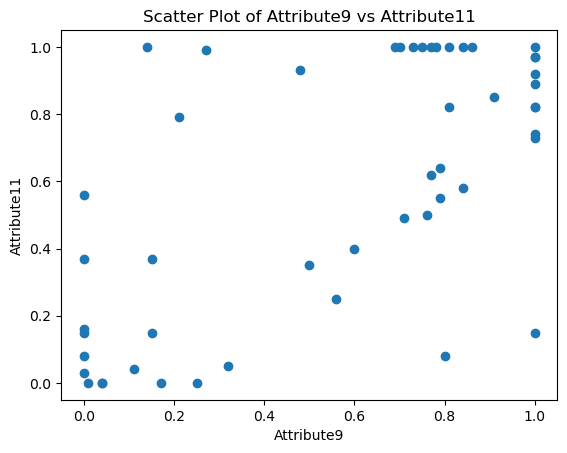

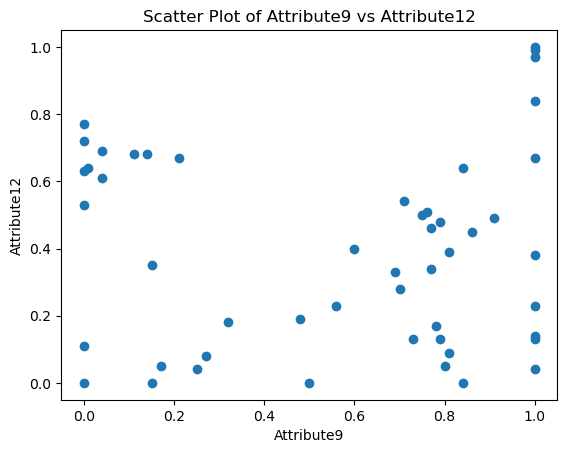

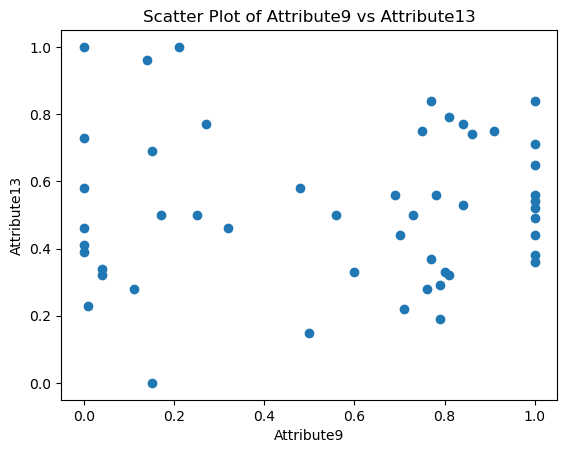

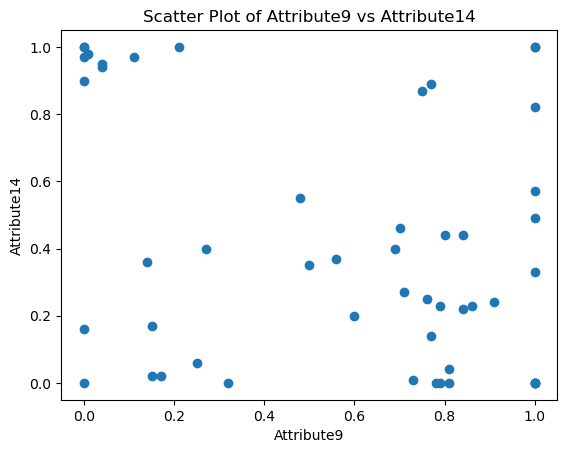

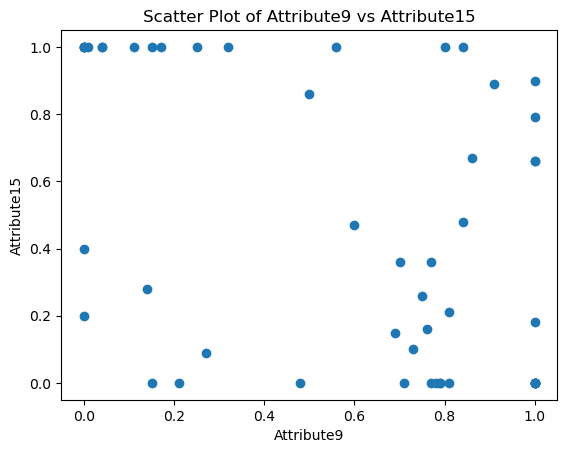

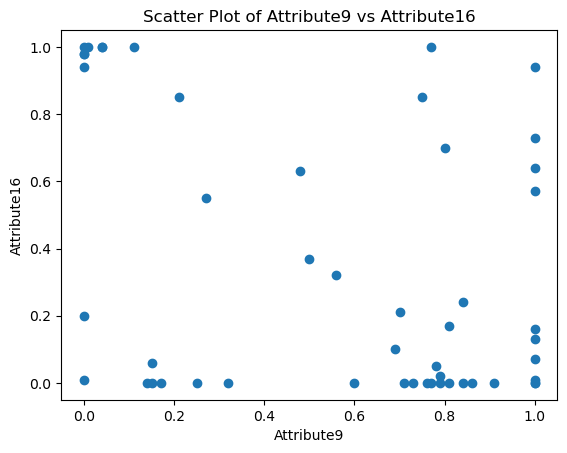

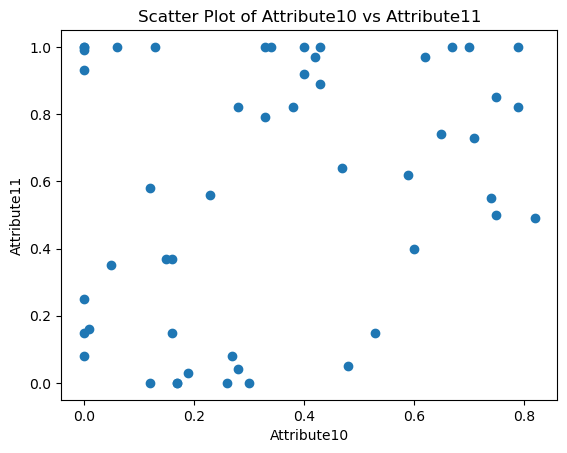

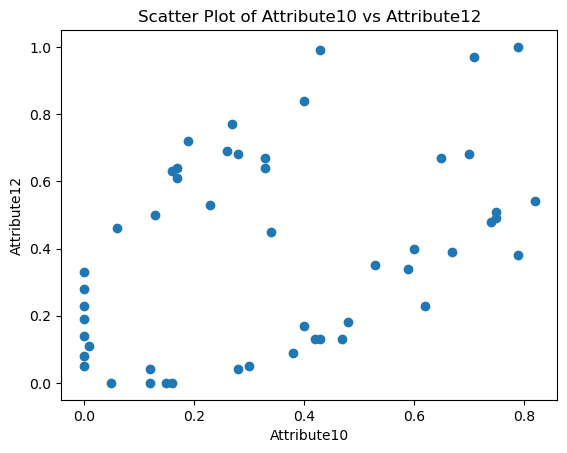

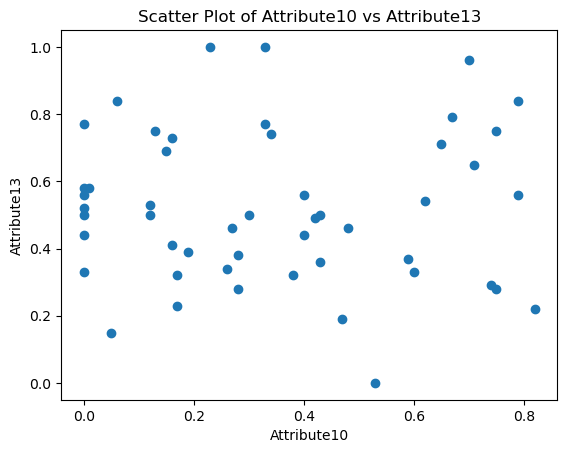

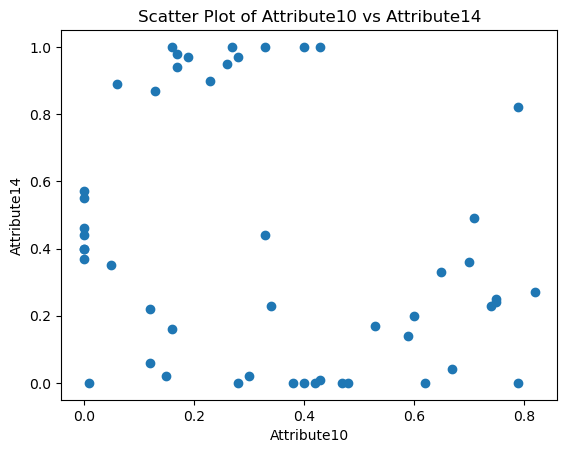

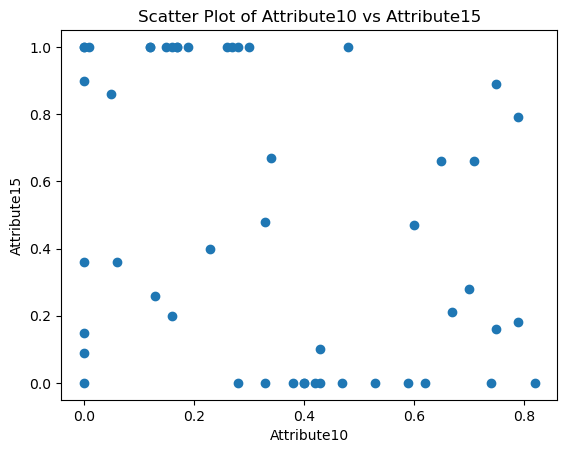

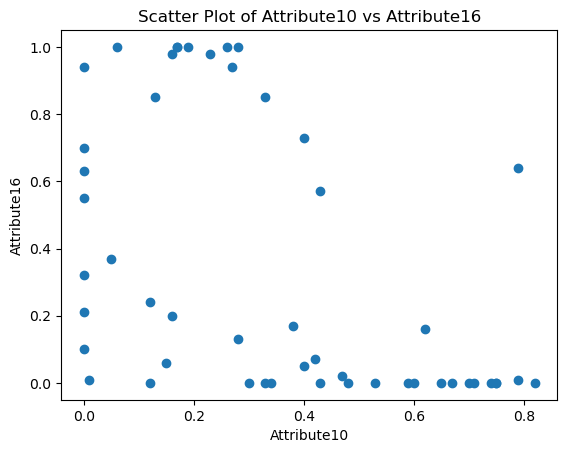

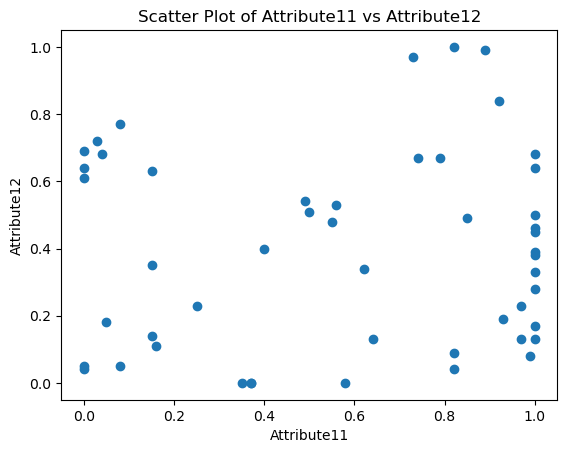

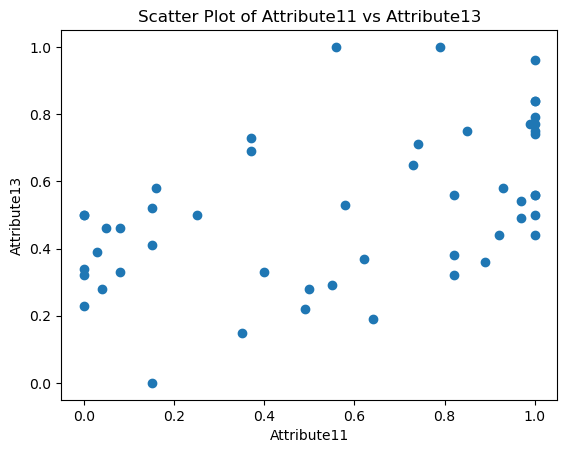

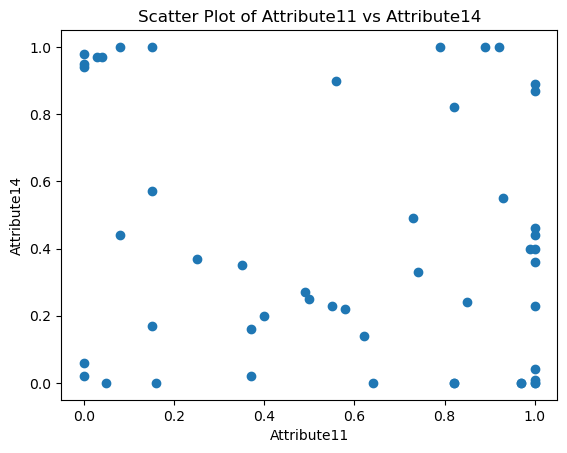

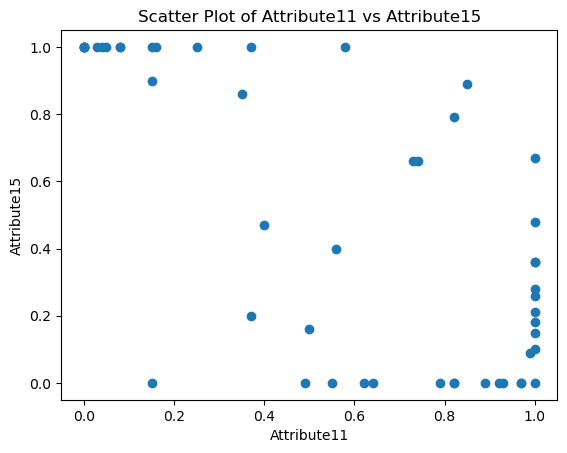

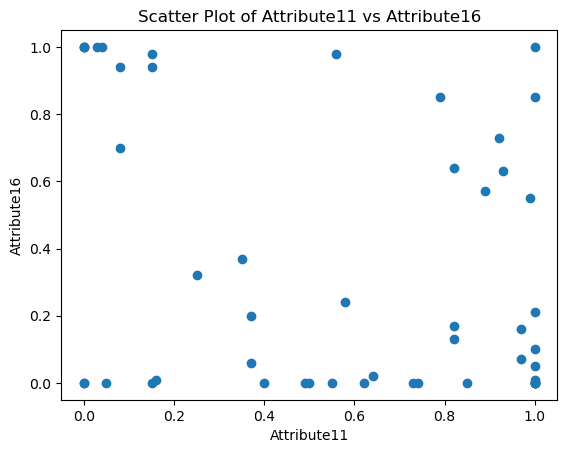

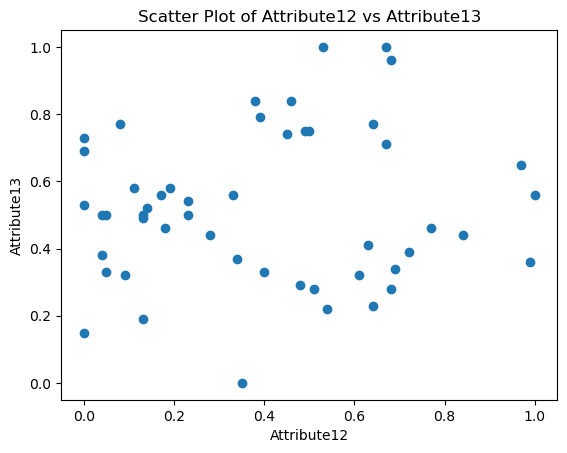

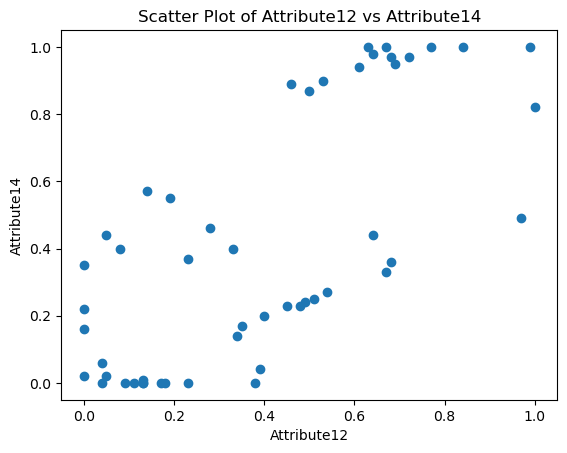

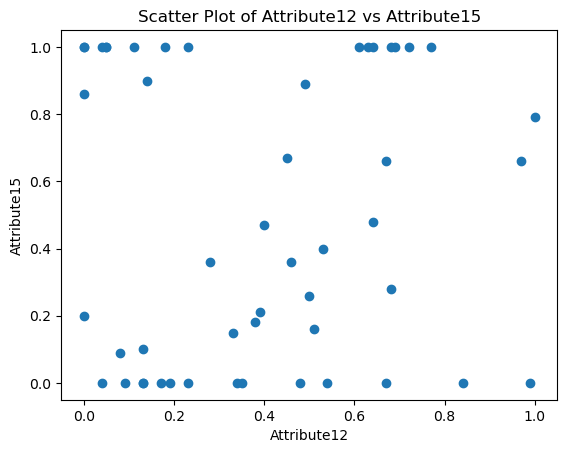

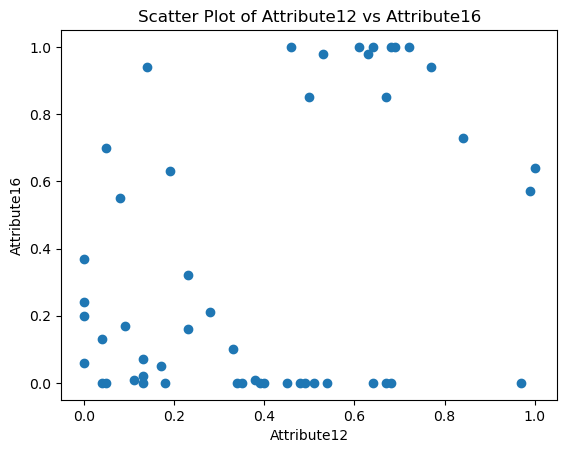

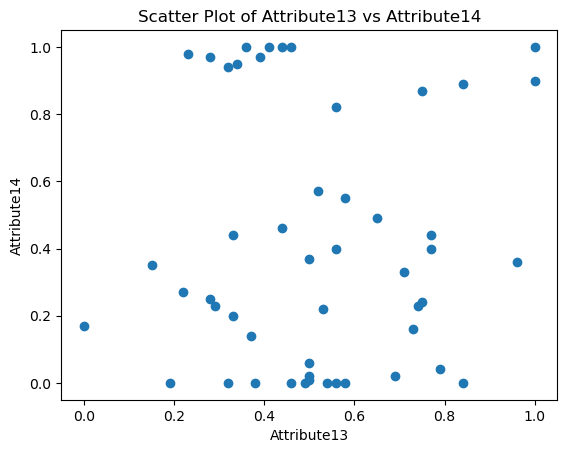

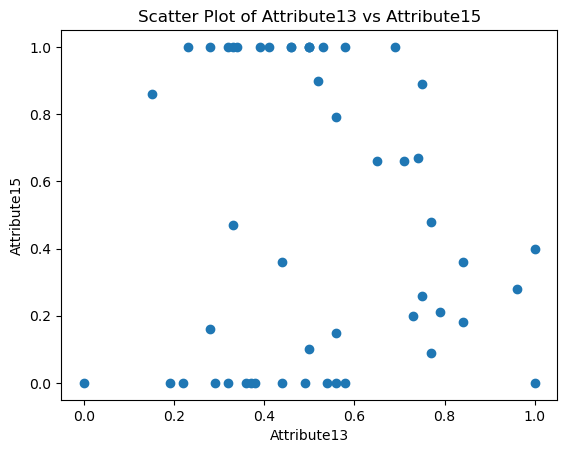

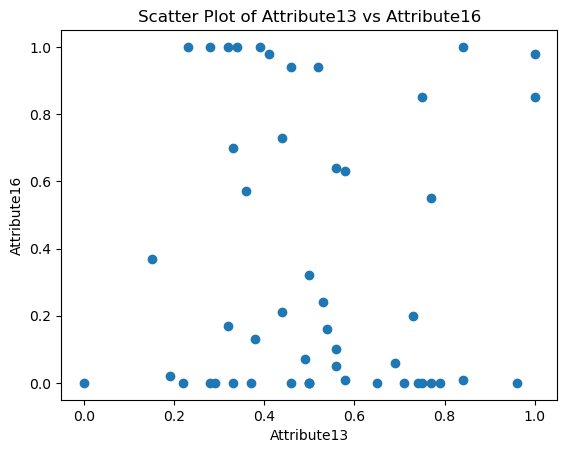

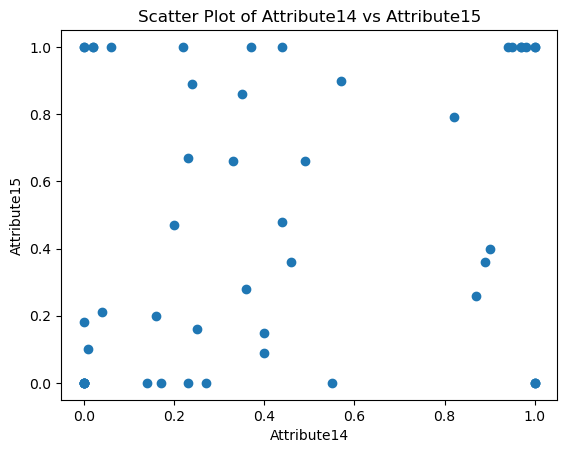

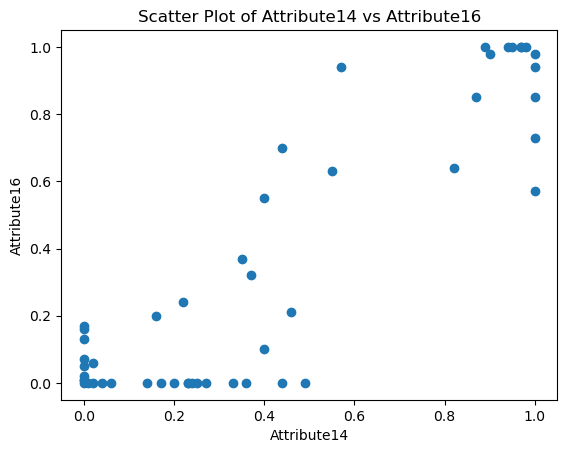

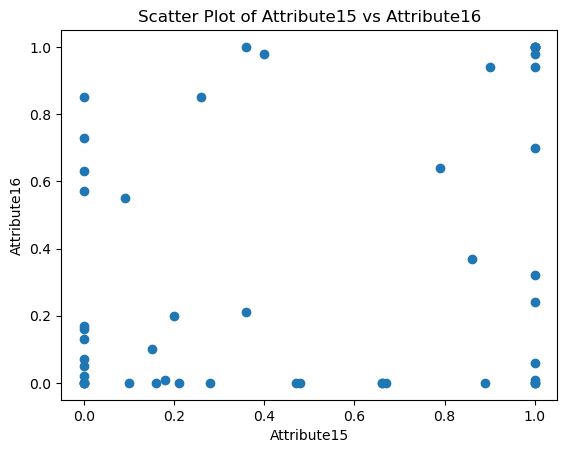

In [ ]:
import matplotlib.pyplot as plt

data_x_normal = clust.normalisation(X)
data_x_normal_vit = data_x_normal[0:50] 
attributes = data_x_normal.columns

# Créer un nuage de points pour chaque paire d'attributs
for i in range(len(attributes)):
    for j in range(i+1, len(attributes)):
        plt.scatter(data_x_normal_vit[attributes[i]], data_x_normal_vit[attributes[j]])
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
        plt.title(f'Scatter Plot of {attributes[i]} vs {attributes[j]}')
        plt.show()

In [ ]:
X.iloc[ :5, 0:5]

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5
0,47,100,27,81,57
1,0,89,27,100,42
2,0,57,31,68,72
3,0,100,7,92,5
4,0,67,49,83,100


/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

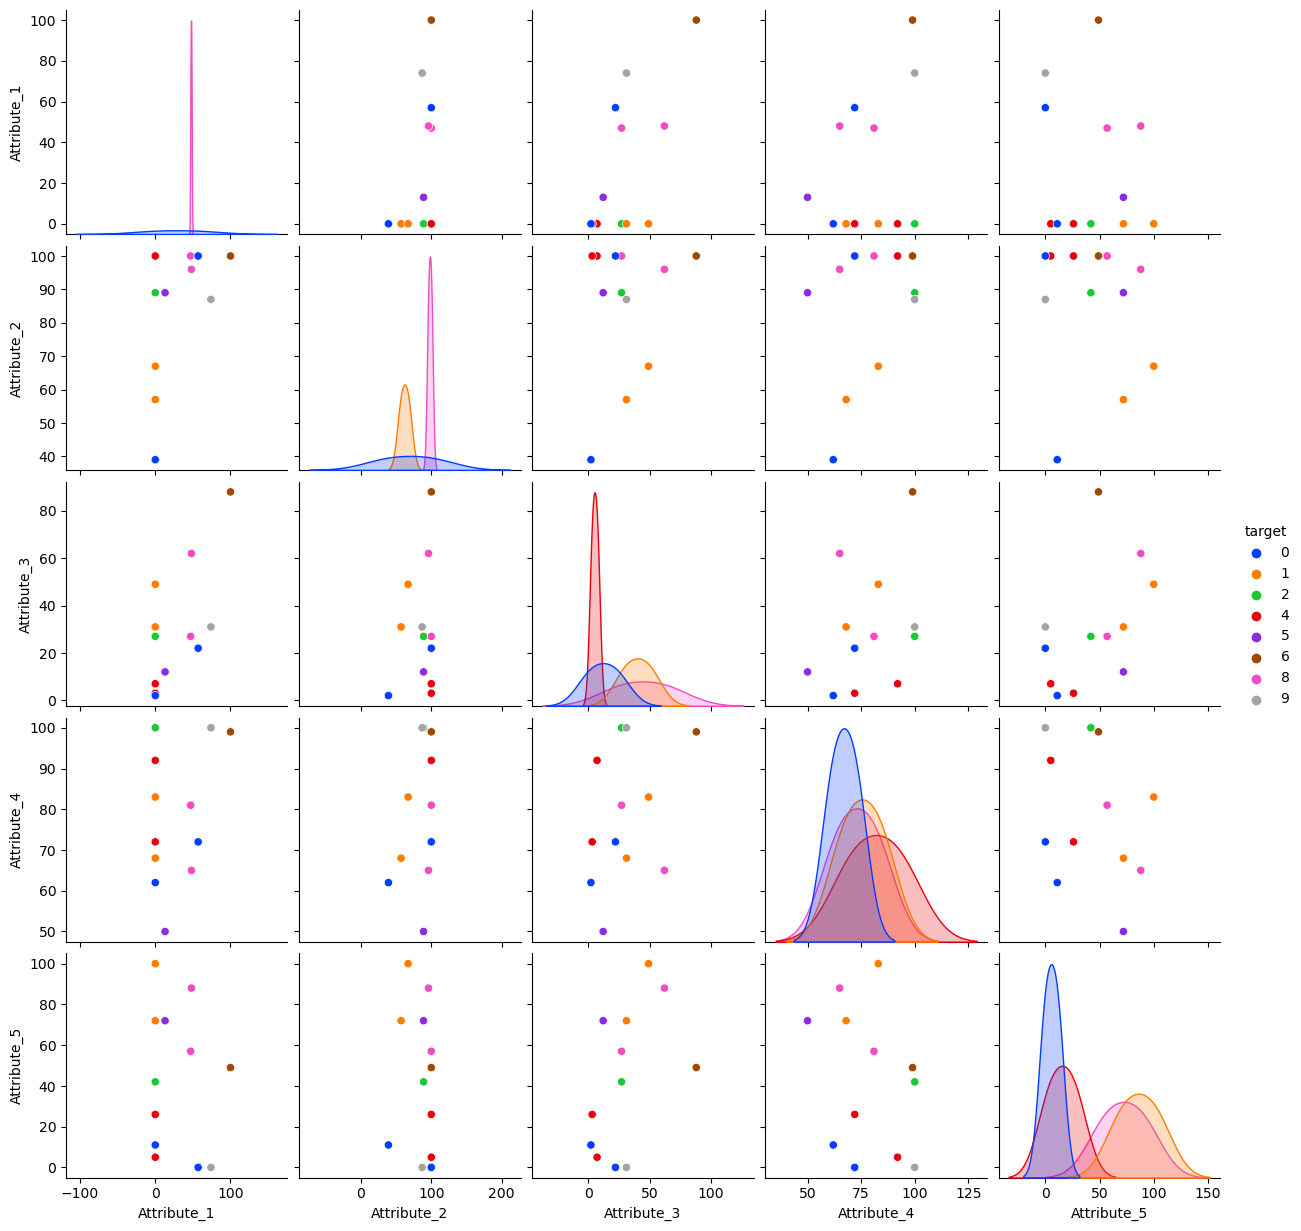

In [ ]:
import seaborn as sns

# Subset the data
subset = X.iloc[:12, :5].copy()

# Rename columns for better visualization (optional)
subset.columns = [f'Attribute_{i+1}' for i in range(5)]

# Add the target column to the DataFrame
subset['target'] = y.iloc[:12]

# Plot the pairplot with seaborn
sns.pairplot(subset, hue='target', palette='bright')

In [ ]:
data_x_normal[0:5]

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,0.47,1.00,0.27,0.81,0.57,0.37,0.26,0.00,0.00,0.23,0.56,0.53,1.00,0.90,0.40,0.98
1,0.00,0.89,0.27,1.00,0.42,0.75,0.29,0.45,0.15,0.15,0.37,0.00,0.69,0.02,1.00,0.06
2,0.00,0.57,0.31,0.68,0.72,0.90,1.00,1.00,0.76,0.75,0.50,0.51,0.28,0.25,0.16,0.00
3,0.00,1.00,0.07,0.92,0.05,0.68,0.19,0.45,0.86,0.34,1.00,0.45,0.74,0.23,0.67,0.00
4,0.00,0.67,0.49,0.83,1.00,1.00,0.81,0.80,0.60,0.60,0.40,0.40,0.33,0.20,0.47,0.00


In [ ]:
clust.CHA_centroid(data_x_normal[0:15],verbose=True,dendrogramme=True)

NameError: name 'clust' is not defined

In [ ]:
print("Centroide de toutes les données de la base:\n",clust.centroide(data_x_normal))

Centroide de toutes les données de la base:
 [0.3881432  0.85120269 0.40605622 0.83774199 0.49770378 0.65573144
 0.51220251 0.44498999 0.56868541 0.33695961 0.60516376 0.3482651
 0.55022289 0.34937045 0.47287482 0.28845342]


In [ ]:
print(f"inertie de l'ensemble : {clust.inertie_cluster(data_x_normal):1.4f}")

inertie de l'ensemble : 16348.8518


In [ ]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Par exemple (mais vous ne devriez pas pouvoir retrouver exactement les mêmes !)
Centroides_test = clust.init_kmeans(3,data_x_normal)
Centroides_test

array([[0.27, 1.  , 0.  , 0.58, 0.12, 0.05, 0.62, 0.  , 1.  , 0.39, 0.97,
        0.91, 0.48, 0.97, 0.18, 0.53],
       [1.  , 0.81, 0.52, 1.  , 0.06, 0.75, 0.  , 0.39, 0.31, 0.06, 0.9 ,
        0.  , 0.68, 0.3 , 0.1 , 0.19],
       [0.2 , 0.66, 0.34, 1.  , 0.41, 0.74, 0.29, 0.32, 0.  , 0.  , 0.08,
        0.  , 0.54, 0.04, 1.  , 0.11]])

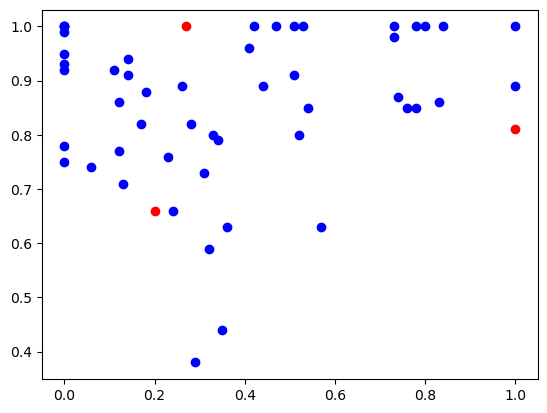

In [ ]:
plt.scatter(data_x_normal['Attribute1'][:500:10],data_x_normal['Attribute2'][:500:10],color='blue')
plt.scatter(Centroides_test[:,0],Centroides_test[:,1],color='red')

In [ ]:
for i in range(0,len(data_x_normal[0:10])):
    pproche = clust.plus_proche(data_x_normal.iloc[i],Centroides_test)
    print("L'exemple ",i," est le plus proche du centroide ",pproche)

L'exemple  0  est le plus proche du centroide  0
L'exemple  1  est le plus proche du centroide  2
L'exemple  2  est le plus proche du centroide  2
L'exemple  3  est le plus proche du centroide  1
L'exemple  4  est le plus proche du centroide  2
L'exemple  5  est le plus proche du centroide  1
L'exemple  6  est le plus proche du centroide  0
L'exemple  7  est le plus proche du centroide  0
L'exemple  8  est le plus proche du centroide  2
L'exemple  9  est le plus proche du centroide  0


In [ ]:
DictAffect = clust.affecte_cluster(data_x_normal, Centroides_test)
print("longeur clé = ",len(DictAffect))
print(DictAffect.keys())
DictAffect

longeur clé =  3
dict_keys([0, 1, 2])


{0: [0,
  6,
  7,
  9,
  11,
  25,
  26,
  27,
  33,
  34,
  52,
  54,
  58,
  62,
  69,
  71,
  72,
  73,
  76,
  87,
  88,
  92,
  93,
  95,
  100,
  102,
  103,
  104,
  106,
  107,
  111,
  113,
  115,
  122,
  123,
  124,
  125,
  137,
  138,
  139,
  140,
  146,
  147,
  156,
  163,
  165,
  168,
  178,
  181,
  183,
  189,
  193,
  195,
  200,
  201,
  205,
  208,
  210,
  211,
  224,
  229,
  237,
  239,
  241,
  247,
  249,
  255,
  257,
  261,
  265,
  268,
  269,
  276,
  281,
  294,
  315,
  324,
  327,
  343,
  348,
  354,
  356,
  359,
  363,
  368,
  371,
  376,
  377,
  379,
  387,
  396,
  397,
  401,
  402,
  418,
  421,
  428,
  430,
  432,
  438,
  441,
  445,
  452,
  466,
  470,
  478,
  485,
  486,
  487,
  491,
  499,
  503,
  507,
  509,
  516,
  518,
  531,
  539,
  545,
  547,
  548,
  549,
  559,
  564,
  565,
  572,
  582,
  583,
  587,
  592,
  595,
  597,
  605,
  607,
  611,
  623,
  624,
  627,
  633,
  641,
  651,
  655,
  658,
  661,
  676,
  678,
  6

In [ ]:
data_x_normal.iloc[DictAffect[0]]

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,0.47,1.00,0.27,0.81,0.57,0.37,0.26,0.00,0.00,0.23,0.56,0.53,1.00,0.90,0.40,0.98
6,0.00,1.00,0.03,0.72,0.26,0.35,0.85,0.35,1.00,0.71,0.73,0.97,0.65,0.49,0.66,0.00
7,0.00,0.39,0.02,0.62,0.11,0.05,0.63,0.00,1.00,0.43,0.89,0.99,0.36,1.00,0.00,0.57
9,0.57,1.00,0.22,0.72,0.00,0.31,0.25,0.00,0.75,0.13,1.00,0.50,0.75,0.87,0.26,0.85
11,0.48,0.96,0.62,0.65,0.88,0.27,0.21,0.00,0.21,0.33,0.79,0.67,1.00,1.00,0.00,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10978,0.41,0.72,0.07,0.50,0.00,0.07,0.46,0.00,0.82,0.34,1.00,0.76,0.59,1.00,0.15,0.76
10979,0.11,0.75,0.04,0.45,0.21,0.01,0.81,0.00,1.00,0.43,0.88,0.87,0.29,1.00,0.00,0.67
10987,0.36,1.00,0.24,0.70,0.00,0.38,0.49,0.33,0.95,0.47,0.87,0.55,0.96,0.21,1.00,0.00
10989,0.56,1.00,0.27,0.79,0.00,0.39,0.12,0.00,0.66,0.15,1.00,0.51,0.93,0.93,0.38,0.93


In [ ]:
clust.nouveaux_centroides(data_x_normal, DictAffect)

array([[0.31080032, 0.86125594, 0.1641878 , 0.6277496 , 0.26227813,
        0.32088748, 0.57608954, 0.23622425, 0.77986133, 0.44411648,
        0.79392235, 0.6854794 , 0.64270998, 0.70800317, 0.35414422,
        0.50097068],
       [0.63009071, 0.89815708, 0.55705658, 0.90799475, 0.46042254,
        0.74268083, 0.37374314, 0.53771306, 0.6252805 , 0.37347338,
        0.85422058, 0.25141561, 0.58227023, 0.17503223, 0.14791836,
        0.13843877],
       [0.19690582, 0.79930591, 0.40089974, 0.89283244, 0.67306847,
        0.76812106, 0.61006544, 0.4773592 , 0.38871699, 0.23800654,
        0.25000467, 0.2441692 , 0.4642954 , 0.30849965, 0.86103061,
        0.30995793]])

In [ ]:
print(f'Inertie globale: {clust.inertie_globale(data_x_normal,DictAffect):1.4f}')

Inertie globale: 11142.0086


In [ ]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(2, data_x_normal, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

itération  0  Inertie :  13763.974276165223  Difference:  13763.974276165223
itération  1  Inertie :  13131.625916108052  Difference:  632.3483600571708
itération  2  Inertie :  12972.360345552097  Difference:  159.2655705559555
itération  3  Inertie :  12935.593411056128  Difference:  36.7669344959686
itération  4  Inertie :  12907.266505058076  Difference:  28.326905998052098
itération  5  Inertie :  12864.668507719196  Difference:  42.597997338880305
itération  6  Inertie :  12825.10990400755  Difference:  39.558603711646356
itération  7  Inertie :  12813.992851372186  Difference:  11.117052635363507
itération  8  Inertie :  12812.094017141437  Difference:  1.898834230749344
itération  9  Inertie :  12811.882742409225  Difference:  0.21127473221167747
itération  10  Inertie :  12811.877628181563  Difference:  0.005114227662488702
Affichage des centres:  [[0.39079109 0.86858295 0.19468126 0.64142857 0.37019969 0.30283794
  0.49784562 0.07946237 0.50000768 0.23754608 0.55110215 0.6151

In [ ]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(3, data_x_normal[::10], 0.005, 100)

print("Affichage des centres: ",les_centres)

itération  0  Inertie :  1178.625269457153  Difference:  1178.625269457153
itération  1  Inertie :  1099.9085687047102  Difference:  78.71670075244288
itération  2  Inertie :  1058.4942649193226  Difference:  41.414303785387574
itération  3  Inertie :  1041.0292552028195  Difference:  17.46500971650312
itération  4  Inertie :  1031.5188499208698  Difference:  9.510405281949716
itération  5  Inertie :  1029.68489882842  Difference:  1.8339510924497517
itération  6  Inertie :  1029.5107958696267  Difference:  0.17410295879335536
itération  7  Inertie :  1029.4862871056118  Difference:  0.024508764014854023
itération  8  Inertie :  1029.4739491573787  Difference:  0.012337948233152929
itération  9  Inertie :  1029.466784833096  Difference:  0.007164324282712187
itération  10  Inertie :  1029.466784833096  Difference:  0.0
Affichage des centres:  [[0.51244565 0.92763587 0.26595109 0.71828804 0.20206522 0.38035326
  0.35777174 0.18557065 0.62913043 0.26576087 0.84483696 0.50902174
  0.69038

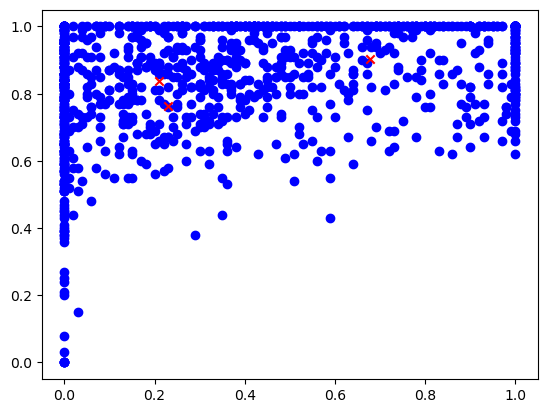

In [ ]:
plt.scatter(data_x_normal['Attribute1'][::10],data_x_normal['Attribute2'][::10],color='b')
plt.scatter(les_centres[:,0],les_centres[:,1],color='r',marker='x')

In [ ]:
def affiche_resultat(Base, Centres, Affect):
    # Supposons que le nombre de clusters est égal au nombre de lignes dans Centres
    couleurs = cm.tab20(np.linspace(0, 1, len(Centres)))

    
    # Affichage des points par cluster
    for i, points_indices in Affect.items():
        plt.scatter(Base.iloc[points_indices, 0], Base.iloc[points_indices, 1], color=couleurs[i], label=f'Cluster {i}')
    
    # Affichage des centres des clusters
    for i, center_coords in enumerate(Centres):
        plt.scatter(center_coords[0], center_coords[1], color=couleurs[i], marker='x', s=100, label=f'Centre {i}')

    plt.show()

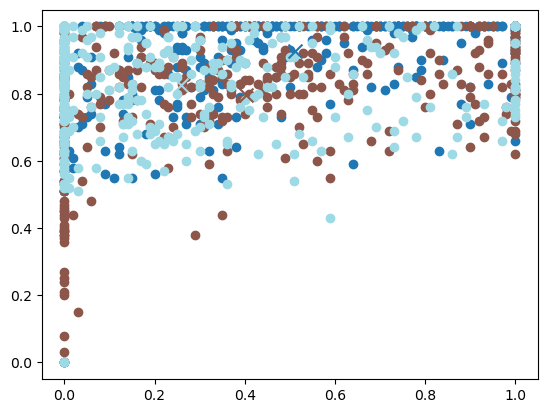

In [ ]:
affiche_resultat(data_x_normal[::10],les_centres,l_affectation)